In [22]:
import os
import pandas as pd
import re

file_list = os.listdir("NYC")
columns_name_dict = {}
for file in file_list:
    print("\n", file)
    extension = file.split(".")[1]
    if extension != 'pdf':
        if extension == 'csv':
            df = pd.read_csv("NYC/"+file)
        elif extension == 'xls':
            df = pd.read_excel("NYC/"+file, header=3)
            unwanted_columns = [col for col in df.columns if 'nname' in col.lower()]
            if len(unwanted_columns) > 4:
                df = pd.read_excel("NYC/"+file, header=4)
        elif extension == 'xlsx':
            df = pd.read_excel("NYC/"+file, header=4)
        unwanted_columns = [col for col in df.columns if 'nname' in col.lower()]
        df = df.drop(columns=unwanted_columns)
        df.columns = [name.strip("\n") for name in df.columns]
        columns_name_dict[file] = tuple(set(df.columns))

grouped_dict = {}
for key, value in columns_name_dict.items():
    if value in grouped_dict:
        grouped_dict[value] += (key,)
    else:
        grouped_dict[value] = (key,)


 2009_bronx.xls

 2009_brooklyn.xls

 2009_manhattan.xls

 2009_queens.xls

 2009_statenisland.xls

 2010_bronx.xls

 2010_brooklyn.xls

 2010_manhattan.xls

 2010_queens.xls

 2010_statenisland.xls

 2011_bronx.xls

 2011_brooklyn.xls

 2011_manhattan.xls

 2011_queens.xls

 2011_statenisland.xls

 2012_bronx.xls

 2012_brooklyn.xls

 2012_manhattan.xls

 2012_queens.xls

 2012_statenisland.xls

 2013_bronx.xls

 2013_brooklyn.xls

 2013_manhattan.xls

 2013_queens.xls

 2013_statenisland.xls

 2014_bronx.xls

 2014_brooklyn.xls

 2014_manhattan.xls

 2014_queens.xls

 2014_statenisland.xls

 2015_bronx.xls

 2015_brooklyn.xls

 2015_manhattan.xls

 2015_queens.xls

 2015_statenisland.xls

 glossary_rsf071607.pdf

 nyc-rolling-sales.csv

 NYC_Citywide_Annualized_Calendar_Sales_Update_20231101.csv


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3735705123.py:12: DtypeWarning: Columns (0,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC/"+file)



 NYC_Citywide_Rolling_Calendar_Sales_20231101.csv

 rollingsales_bronx.xlsx

 rollingsales_brooklyn.xlsx

 rollingsales_manhattan.xlsx

 rollingsales_queens.xlsx

 rollingsales_statenisland.xlsx

 sales_2007_bronx.xls

 sales_2007_brooklyn.xls

 sales_2007_manhattan.xls

 sales_2007_queens.xls

 sales_2007_statenisland.xls

 sales_2008_bronx.xls

 sales_2008_brooklyn.xls

 sales_2008_manhattan.xls

 sales_2008_queens.xls

 sales_2008_statenisland.xls

 sales_bronx_03.xls

 sales_bronx_04.xls

 sales_bronx_05.xls

 sales_bronx_06.xls

 sales_brooklyn_03.xls

 sales_brooklyn_04.xls

 sales_brooklyn_05.xls

 sales_brooklyn_06.xls

 sales_manhattan_03.xls

 sales_manhattan_04.xls

 sales_manhattan_05.xls

 sales_manhattan_06.xls

 sales_queens_03.xls

 sales_queens_04.xls

 sales_queens_05.xls

 sales_queens_06.xls

 sales_si_03.xls

 sales_si_04.xls

 sales_si_05.xls

 sales_si_06.xls


In [24]:
def read_file(file):
    print("\n", file)
    extension = file.split(".")[1]
    if extension != 'pdf':
        if extension == 'csv':
            df = pd.read_csv("NYC/"+file)
        elif extension == 'xls':
            df = pd.read_excel("NYC/"+file, header=3)
            unwanted_columns = [col for col in df.columns if 'nname' in col.lower()]
            if len(unwanted_columns) > 4:
                df = pd.read_excel("NYC/"+file, header=4)
        elif extension == 'xlsx':
            df = pd.read_excel("NYC/"+file, header=4)
        unwanted_columns = [col for col in df.columns if 'nname' in col.lower()]
        df = df.drop(columns=unwanted_columns)
        df.columns = [name.strip("\n") for name in df.columns]
    return df

for key, val in grouped_dict.items():
    df_list = []
    name_list = []
    for file in val:
        df = read_file(file)
        df_list.append(df)
        for word in re.split(r'[_.]', file)[:-1]:
            if word not in name_list:
                name_list.append(word)
    column_order = df_list[0].columns
    df_list = [df[column_order] for df in df_list]
    result_df = pd.concat(df_list, ignore_index=True)
    result_df.to_csv("Processed data 1/"+"_".join(name_list)+".csv")


 2009_bronx.xls

 2009_brooklyn.xls

 2009_manhattan.xls

 2009_queens.xls

 2009_statenisland.xls

 2010_bronx.xls

 2010_brooklyn.xls

 2010_manhattan.xls

 2010_queens.xls

 2010_statenisland.xls

 2011_bronx.xls

 2011_brooklyn.xls

 2011_manhattan.xls

 2011_queens.xls

 2011_statenisland.xls

 2012_bronx.xls

 2012_brooklyn.xls

 2012_manhattan.xls

 2012_queens.xls

 2012_statenisland.xls

 2013_bronx.xls

 2013_brooklyn.xls

 2013_manhattan.xls

 2013_queens.xls

 2013_statenisland.xls

 2014_bronx.xls

 2014_brooklyn.xls

 2014_manhattan.xls

 2014_queens.xls

 2014_statenisland.xls

 2015_bronx.xls

 2015_brooklyn.xls

 2015_manhattan.xls

 2015_queens.xls

 2015_statenisland.xls

 nyc-rolling-sales.csv

 NYC_Citywide_Rolling_Calendar_Sales_20231101.csv

 sales_2007_bronx.xls

 sales_2007_brooklyn.xls

 sales_2007_manhattan.xls

 sales_2007_queens.xls

 sales_2007_statenisland.xls

 sales_2008_bronx.xls

 sales_2008_brooklyn.xls

 sales_2008_manhattan.xls

 sales_2008_queens

C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3625589449.py:6: DtypeWarning: Columns (0,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NYC/"+file)



 rollingsales_bronx.xlsx

 rollingsales_brooklyn.xlsx

 rollingsales_manhattan.xlsx

 rollingsales_queens.xlsx

 rollingsales_statenisland.xlsx


In [4]:
import os
import pandas as pd
import re

file_list = os.listdir("Processed data 1")

df_1 = pd.read_csv("Processed data 1/"+file_list[0], index_col=0)
df_1.columns = [name.replace("-","") for name in df_1.columns]
df_2 = pd.read_csv("Processed data 1/"+file_list[1], index_col=0)
df_2.columns = [name.replace("-","") for name in df_2.columns]
df_3 = pd.read_csv("Processed data 1/"+file_list[2], index_col=0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17508\1345820213.py:7: DtypeWarning: Columns (7,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("Processed data 1/"+file_list[0], index_col=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17508\1345820213.py:9: DtypeWarning: Columns (1,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("Processed data 1/"+file_list[1], index_col=0)


In [5]:
def assign_borough(x):
    if x == 1:
        return "Manhattan"
    if x == 2:
        return "Bronx"
    if x == 3:
        return "Brooklyn"
    if x == 4:
        return "Queens"
    if x == 5:
        return "Staten Island"

result_df = pd.concat([df_1, df_2, df_3], ignore_index=True, sort=False)
result_df["SALE DATE"] = pd.to_datetime(result_df["SALE DATE"])
result_df["YEAR"] = result_df["SALE DATE"].dt.year
result_df["MONTH"] = result_df["SALE DATE"].dt.month
result_df["DAY"] = result_df["SALE DATE"].dt.day
result_df["UPPER BUILDING CLASS AT TIME OF SALE"] = result_df["BUILDING CLASS AT TIME OF SALE"].str[0]
result_df["UPPER BUILDING CLASS NAME"] = result_df["UPPER BUILDING CLASS AT TIME OF SALE"].map(building_class_dict_2)
# result_df["YEAR BUILT"] = pd.to_datetime(result_df["YEAR BUILT"], errors='coerce')
result_df["SALE PRICE"] = pd.to_numeric(result_df["SALE PRICE"], errors='coerce')
result_df["GROSS SQUARE FEET"] = pd.to_numeric(result_df["GROSS SQUARE FEET"], errors='coerce')
result_df = result_df.dropna(subset=['SALE PRICE','GROSS SQUARE FEET'])
# result_df["BOROUGH"] = result_df["BOROUGH"].apply(assign_borough)
result_df = result_df[result_df["SALE PRICE"]>10000]
# result_df = result_df[~result_df["Latitude"].isna()]
result_df.index = list(range(len(result_df)))
result_df

BOROUGH               NEIGHBORHOOD  \
0             2  BATHGATE                    
1             2  BATHGATE                    
2             2  BATHGATE                    
3             2  BATHGATE                    
4             2  BATHGATE                    
...         ...                        ...   
1020001       5                    WOODROW   
1020002       5                    WOODROW   
1020003       5                    WOODROW   
1020004       5                    WOODROW   
1020005       5                    WOODROW   

                              BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0        01  ONE FAMILY HOMES                                            1   
1        02  TWO FAMILY HOMES                                            1   
2        02  TWO FAMILY HOMES                                            1   
3        02  TWO FAMILY HOMES                                            1   
4        02  TWO FAMILY HOMES                                            1   
...                                               ...                  ...   
1020001                    05 TAX CLASS 1 VACANT LAND                    1   
1020002                    05 TAX CLASS 1 VACANT LAND                    1   
1020003                    05 TAX CLASS 1 VACANT LAND                   1B   
1020004                    05 TAX CLASS 1 VACANT LAND                   1B   
1020005                            22 STORE BUILDINGS                    4   

         BLOCK  LOT EASEMENT BUILDING CLASS AT PRESENT  \
0         3048   19                                 A5   
1         3030   71                                 B2   
2         3030   76                                 B2   
3         3036   62                                 B1   
4         3036   62                                 B1   
...        ...  ...      ...                       ...   
1020001   6970   84      NaN                        A1   
1020002   6970   85      NaN                        A1   
1020003   6970   86      NaN                        V0   
1020004   6970   87      NaN                        V0   
1020005   7144  510      NaN                        K2   

                                           ADDRESS APARTMENT NUMBER  ...  BIN  \
0        2186 BATHGATE AVENUE                                        ...  NaN   
1        4443 PARK AVENUE                                            ...  NaN   
2        4435 PARK AVENUE                                            ...  NaN   
3        459 EAST 179 STREET                                         ...  NaN   
4        459 EAST 179TH STREET                                       ...  NaN   
...                                            ...              ...  ...  ...   
1020001                         N/A LENEVAR AVENUE              NaN  ...  NaN   
1020002                         N/A LENEVAR AVENUE              NaN  ...  NaN   
1020003                         N/A LENEVAR AVENUE              NaN  ...  NaN   
1020004                          96 LENEVAR AVENUE              NaN  ...  NaN   
1020005                      3120 ARTHUR KILL ROAD              NaN  ...  NaN   

         BBL  NTA  Census Tract 2020 NTA Code  YEAR  MONTH  DAY  \
0        NaN  NaN                NaN      NaN  2009      3   16   
1        NaN  NaN                NaN      NaN  2009      5    8   
2        NaN  NaN                NaN      NaN  2009      3   30   
3        NaN  NaN                NaN      NaN  2009     11   20   
4        NaN  NaN                NaN      NaN  2009      5    4   
...      ...  ...                ...      ...   ...    ...  ...   
1020001  NaN  NaN                NaN      NaN  2022     12   19   
1020002  NaN  NaN                NaN      NaN  2022     12   19   
1020003  NaN  NaN                NaN      NaN  2022     12   19   
1020004  NaN  NaN                NaN      NaN  2022     12   19   
1020005  NaN  NaN                NaN      NaN  2022     12   19   

        UPPER BUILDING CLASS AT TIME OF SAL

In [51]:
for category in building_class_dict_2.values():
    df_4 = result_df[result_df["UPPER BUILDING CLASS NAME"] == category][["GROSS SQUARE FEET","SALE PRICE"]]
    both = len(df_4[(df_4["GROSS SQUARE FEET"]>10)&(df_4["SALE PRICE"]>10)&(~df_4["GROSS SQUARE FEET"].isna())&(~df_4["SALE PRICE"].isna())])/len(df_4)
    gross = len(df_4[(df_4["GROSS SQUARE FEET"]>10)&(~df_4["GROSS SQUARE FEET"].isna())])/len(df_4)
    price = len(df_4[(df_4["SALE PRICE"]>10)&(~df_4["SALE PRICE"].isna())])/len(df_4)
    print(category, both, gross, price)


ONE FAMILY DWELLINGS 0.9902256830260057 0.9902256830260057 1.0
TWO FAMILY DWELLINGS 0.9876465597744154 0.9876465597744154 1.0
WALK UP APARTMENTS 0.6779893784387522 0.6779893784387522 1.0
ELEVATOR APARTMENTS 0.029462023451770666 0.029462023451770666 1.0
WAREHOUSES 0.9272315653298836 0.9272315653298836 1.0
FACTORIES AND INDUSTRIAL BUILDINGS 0.9158260869565218 0.9158260869565218 1.0
GARAGES 0.5081908831908832 0.5081908831908832 1.0
HOTELS 0.9978438594915102 0.9978438594915102 1.0
HOSPITALS AND HEALTH FACILITIES 0.9564270152505446 0.9564270152505446 1.0
THEATRES 0.8709677419354839 0.8709677419354839 1.0
STORE BUILDINGS 0.9525964231846584 0.9525964231846584 1.0
LOFTS 0.8410757946210269 0.8410757946210269 1.0
RELIGIOUS FACILITIES 0.9053627760252366 0.9053627760252366 1.0
ASYLUMS AND HOMES 0.9712230215827338 0.9712230215827338 1.0
OFFICE BUILDINGS 0.9368770764119602 0.9368770764119602 1.0
INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES 0.8825396825396825 0.8825396825396825 1.0
OUTDOOR RECREATIONAL 

In [13]:
building_class_dict_2 = {
    'A': 'ONE FAMILY DWELLINGS',
    'B': 'TWO FAMILY DWELLINGS',
    'C': 'WALK UP APARTMENTS',
    'D': 'ELEVATOR APARTMENTS',
    'E': 'WAREHOUSES',
    'F': 'FACTORIES AND INDUSTRIAL BUILDINGS',
    'G': 'GARAGES',
    'H': 'HOTELS',
    'I': 'HOSPITALS AND HEALTH FACILITIES',
    'J': 'THEATRES',
    'K': 'STORE BUILDINGS',
    'L': 'LOFTS',
    'M': 'RELIGIOUS FACILITIES',
    'N': 'ASYLUMS AND HOMES',
    'O': 'OFFICE BUILDINGS',
    'P': 'INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES',
    'Q': 'OUTDOOR RECREATIONAL FACILITIES',
    'R': 'CONDOMINIUMS',
    'S': 'PRIMARILY RES. - MIXED USE',
    'T': 'TRANSPORTATION FACILITIES',
    'U': 'UTILITY BUREAU PROPERTIES',
    'V': 'VACANT LAND',
    'W': 'EDUCATIONAL FACILITIES',
    'Y': 'GOVERNMENT/CITY DEPARTMENTS',
    'Z': 'MISC. BUILDING CLASSIFICATIONS',
}
df = result_df.groupby(['DAY', "MONTH","YEAR","UPPER BUILDING CLASS AT TIME OF SALE"]).sum()
df = df.reset_index(level=['DAY', 'MONTH', 'YEAR', "UPPER BUILDING CLASS AT TIME OF SALE"])
df["UPPER BUILDING CLASS NAME"] = df["UPPER BUILDING CLASS AT TIME OF SALE"].map(building_class_dict_2)
df = df[(df["GROSS SQUARE FEET"]>10)&(df["SALE PRICE"]>10)&(~df["GROSS SQUARE FEET"].isna())&(~df["SALE PRICE"].isna())]
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.sort_values("DATE")
df = df[['DATE', 'GROSS SQUARE FEET',
       'SALE PRICE', 'UPPER BUILDING CLASS NAME']]
df["PRICE PER GROSS AREA"] = df['SALE PRICE']/df['GROSS SQUARE FEET']
df_pivot = pd.pivot_table(df, values='PRICE PER GROSS AREA', index=["DATE"], columns='UPPER BUILDING CLASS NAME')
# df_pivot = df_pivot[df_3["UPPER BUILDING CLASS AT TIME OF SALE"]]
sort_list = ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index
df_pivot = df_pivot.ffill()[100:]#.to_csv("year month sale number of different classes of 20 years.csv")
df_pivot

UPPER BUILDING CLASS NAME  ASYLUMS AND HOMES  CONDOMINIUMS  \
DATE                                                         
2003-04-13                         84.064327     37.295523   
2003-04-14                         84.064327     37.295523   
2003-04-15                         84.064327     37.295523   
2003-04-16                         84.064327     37.295523   
2003-04-17                         84.064327     37.295523   
...                                      ...           ...   
2023-09-25                        379.554656     22.640160   
2023-09-26                        379.554656     22.640160   
2023-09-27                        379.554656     22.640160   
2023-09-28                        379.554656     22.640160   
2023-09-29                        379.554656     22.640160   

UPPER BUILDING CLASS NAME  EDUCATIONAL FACILITIES  ELEVATOR APARTMENTS  \
DATE                                                                     
2003-04-13                             170.454545          1169.582209   
2003-04-14                             170.454545            53.105823   
2003-04-15                             170.454545          1379.158739   
2003-04-16                             170.454545          1379.158739   
2003-04-17                             170.454545          1379.158739   
...                                           ...                  ...   
2023-09-25                            3006.580440             4.567348   
2023-09-26                            3006.580440             4.653038   
2023-09-27                            3006.580440             3.041472   
2023-09-28                            3006.580440             3.041472   
2023-09-29                            3006.580440             4.612481   

UPPER BUILDING CLASS NAME  FACTORIES AND INDUSTRIAL BUILDINGS     GARAGES  \
DATE                                                                        
2003-04-13                                          16.096415  160.038971   
2003-04-14                                          16.096415  134.106808   
2003-04-15                                          16.096415  102.978666   
2003-04-16                                          71.153846  102.978666   
2003-04-17                                          75.292398  217.500000   
...                                                       ...         ...   
2023-09-25                                         525.365951  734.375000   
2023-09-26                                         525.365951  734.375000   
2023-09-27                                         525.365951  734.375000   
2023-09-28                                         550.000000  734.375000   
2023-09-29                                         550.000000  734.375000   

UPPER BUILDING CLASS NAME  GOVERNMENT/CITY DEPARTMENTS  \
DATE                                                     
2003-04-13                                    3.823529   
2003-04-14                                    3.823529   
2003-04-15                                    3.823529   
2003-04-16                                    3.823529   
2003-04-17                                    3.823529   
...                                                ...   
2023-09-25                                  261.493454   
2023-09-26                                  261.493454   
2023-09-27                                  261.493454   
2023-09-28                                  261.493454   
2023-09-29                                  261.493454   

UPPER BUILDING CLASS NAME  HOSPITALS AND HEALTH FACILITIES      HOTELS  \
DATE                                                                     
2003-04-13                                       77.778000  246.507491   
2003-04-14                                       77.778000  246.507491   
2003-04-15                                       77.778000  246.507491   
2003-04-16                                       77.778000  246.507491   
2003-04-17                   

In [12]:
(df_pivot.isna().sum()/len(df_pivot))

UPPER BUILDING CLASS NAME
ASYLUMS AND HOMES                            0.000000
CONDOMINIUMS                                 0.000000
EDUCATIONAL FACILITIES                       0.000000
ELEVATOR APARTMENTS                          0.000000
FACTORIES AND INDUSTRIAL BUILDINGS           0.000000
GARAGES                                      0.000000
GOVERNMENT/CITY DEPARTMENTS                  0.000000
HOSPITALS AND HEALTH FACILITIES              0.000000
HOTELS                                       0.000000
INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES    0.000000
LOFTS                                        0.000000
MISC. BUILDING CLASSIFICATIONS               0.000000
OFFICE BUILDINGS                             0.000000
ONE FAMILY DWELLINGS                         0.000000
OUTDOOR RECREATIONAL FACILITIES              0.000000
PRIMARILY RES. - MIXED USE                   0.000000
RELIGIOUS FACILITIES                         0.000000
STORE BUILDINGS                              0.000000
TH

In [11]:
((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:5]

Index(['ASYLUMS AND HOMES', 'VACANT LAND', 'TWO FAMILY DWELLINGS',
       'TRANSPORTATION FACILITIES', 'THEATRES'],
      dtype='object', name='UPPER BUILDING CLASS NAME')

In [56]:
price = df_pivot["ONE FAMILY DWELLINGS"]
date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
price = price.reindex(date_range)
price = price.ffill()
price

2003-01-01    124.642950
2003-01-02    184.382026
2003-01-03    202.959854
2003-01-04    190.784062
2003-01-05    260.592730
                 ...    
2023-03-27    510.164470
2023-03-28    514.215089
2023-03-29    741.117730
2023-03-30    562.107702
2023-03-31    531.840682
Freq: D, Name: ONE FAMILY DWELLINGS, Length: 7395, dtype: float64

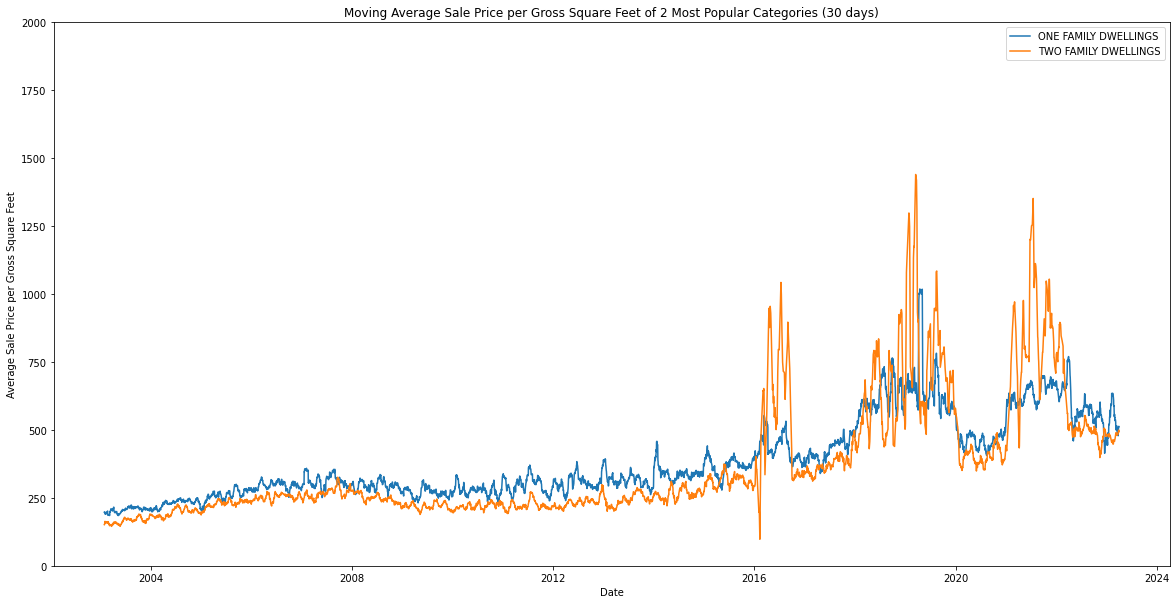

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    window_size = 30
    price = price.ffill()
    plt.plot(price.index, price.rolling(window=window_size).mean(), label=category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Moving Average Sale Price per Gross Square Feet of 2 Most Popular Categories ({str(window_size)} days)'.replace("."," "))
plt.ylim([0,2000])
plt.legend()
plt.savefig(title)
plt.show()

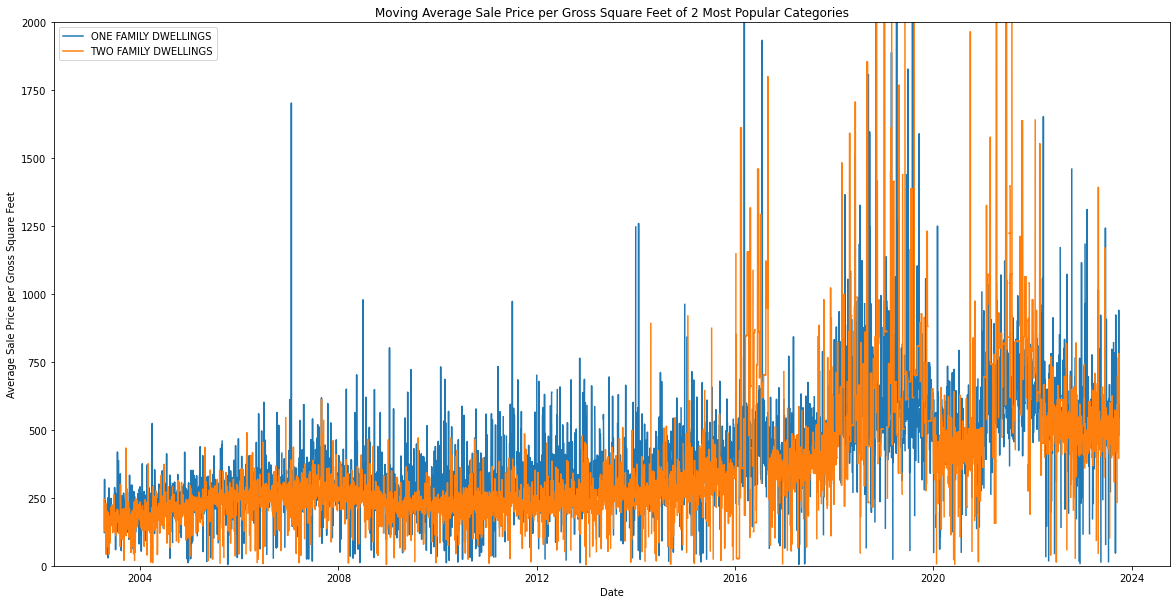

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in sort_list[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    plt.plot(price.index, price, label=category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Moving Average Sale Price per Gross Square Feet of 2 Most Popular Categories'.replace("."," "))
plt.ylim([0,2000])
plt.legend()
# plt.savefig(title)
plt.show()

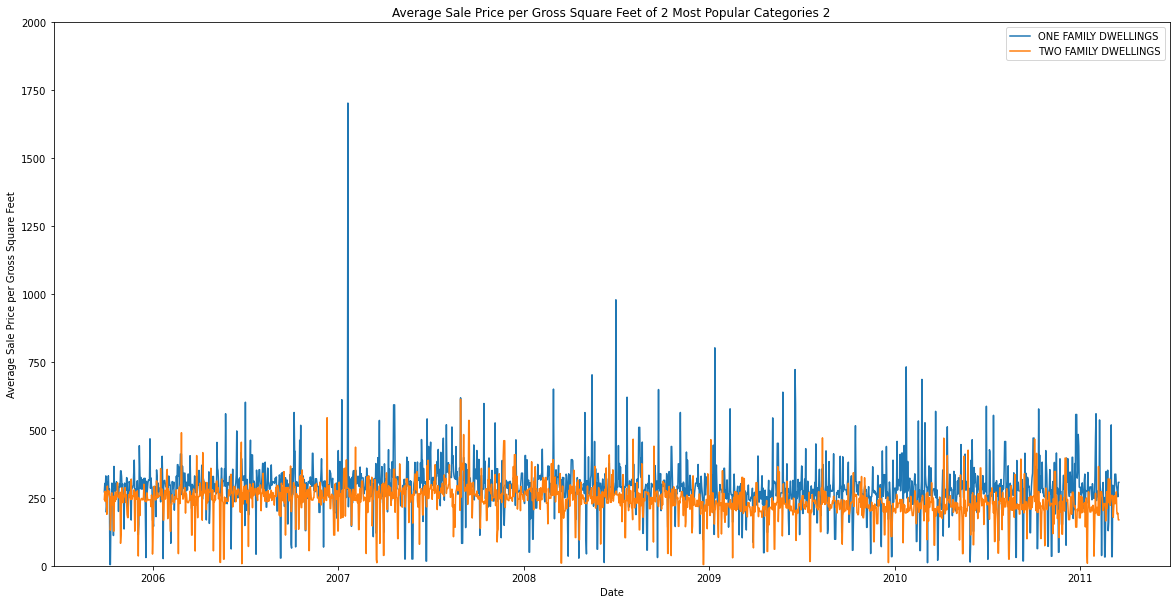

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[1000:3000]
    plt.plot(price.index, price, label=category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Average Sale Price per Gross Square Feet of 2 Most Popular Categories 2'.replace("."," "))
plt.ylim([0,2000])
plt.legend()
plt.savefig(title)
plt.show()

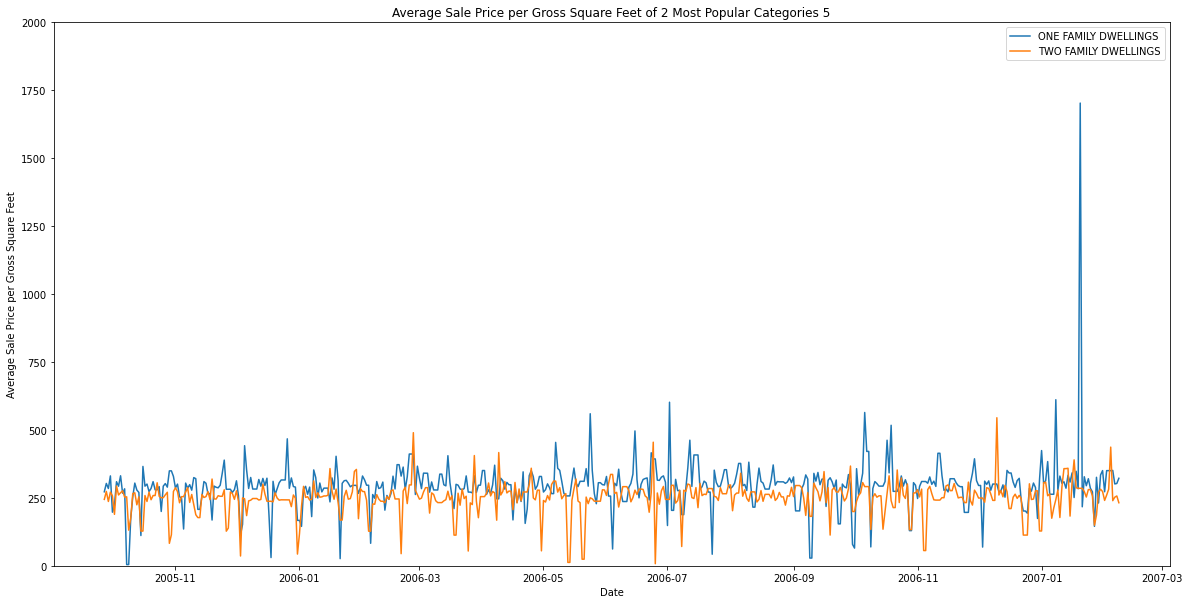

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[1000:1500]
    plt.plot(price.index, price, label=category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Average Sale Price per Gross Square Feet of 2 Most Popular Categories 5'.replace("."," "))
plt.ylim([0,2000])
plt.legend()
plt.savefig(title)
plt.show()

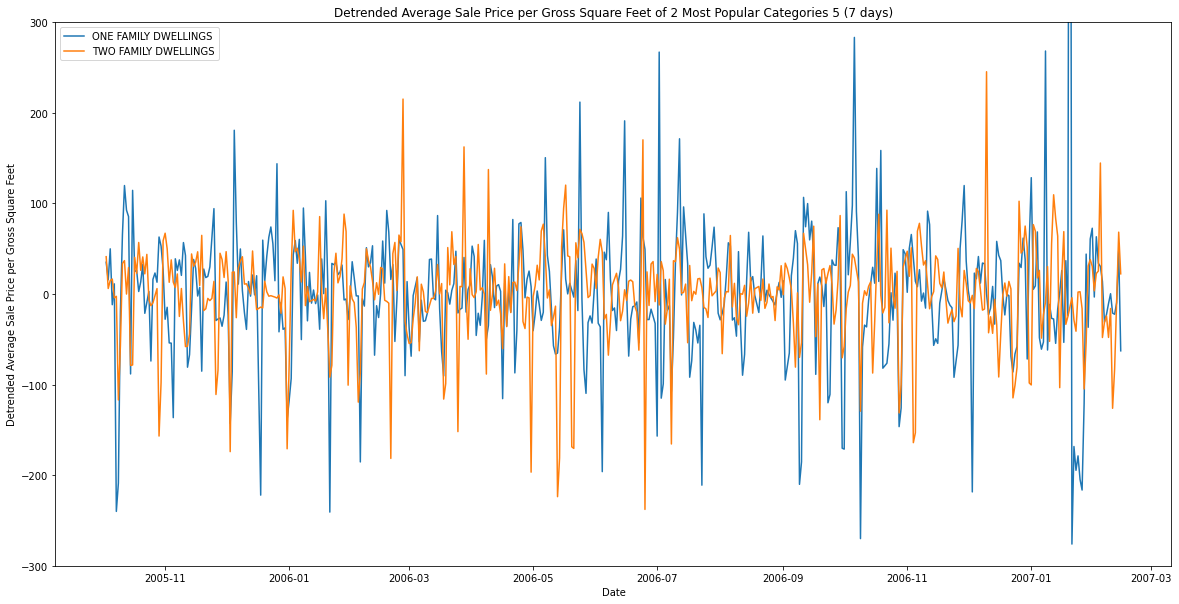

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    window_size = 7
    price = price[window_size-1:] - moving_average(price, window_size)
    price = price[1000:1500]
    plt.plot(price.index, price, label=category)
plt.xlabel('Date')
plt.ylabel('Detrended Average Sale Price per Gross Square Feet')
plt.title(title := f'Average Sale Price per Gross Square Feet of 2 Most Popular Categories 5 (7 days)'.replace("."," "))
plt.ylim([-300,300])
plt.legend()
# plt.savefig(title)
plt.show()

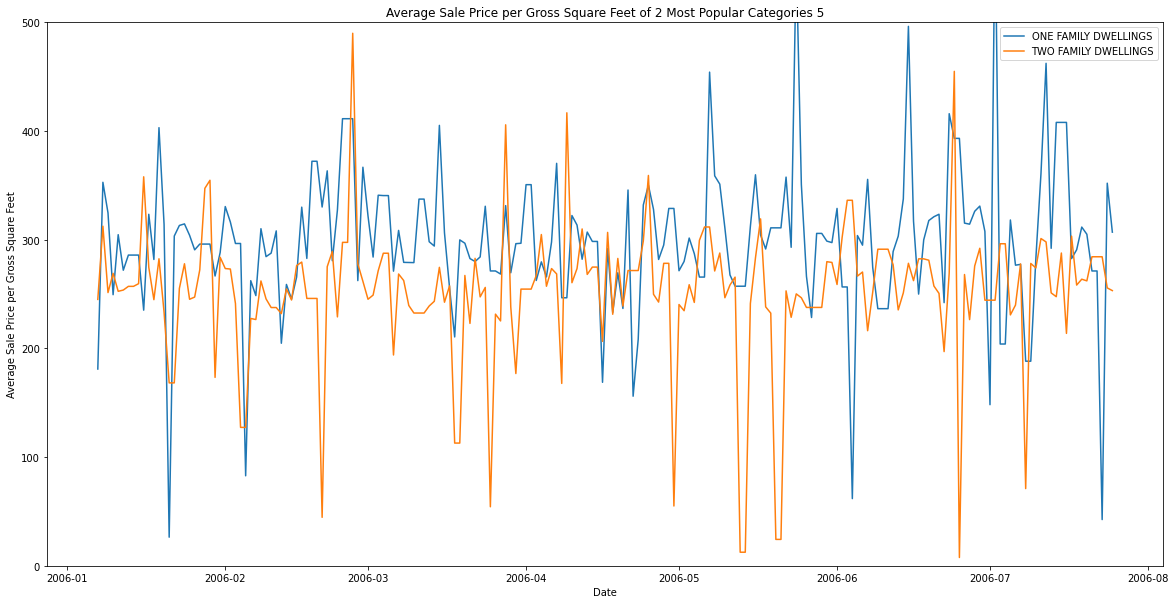

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in sort_list[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[1000:1200]
    plt.plot(price.index, price, label=category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Average Sale Price per Gross Square Feet of 2 Most Popular Categories 5'.replace("."," "))
plt.ylim([0,500])
plt.legend()
# plt.savefig(title)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


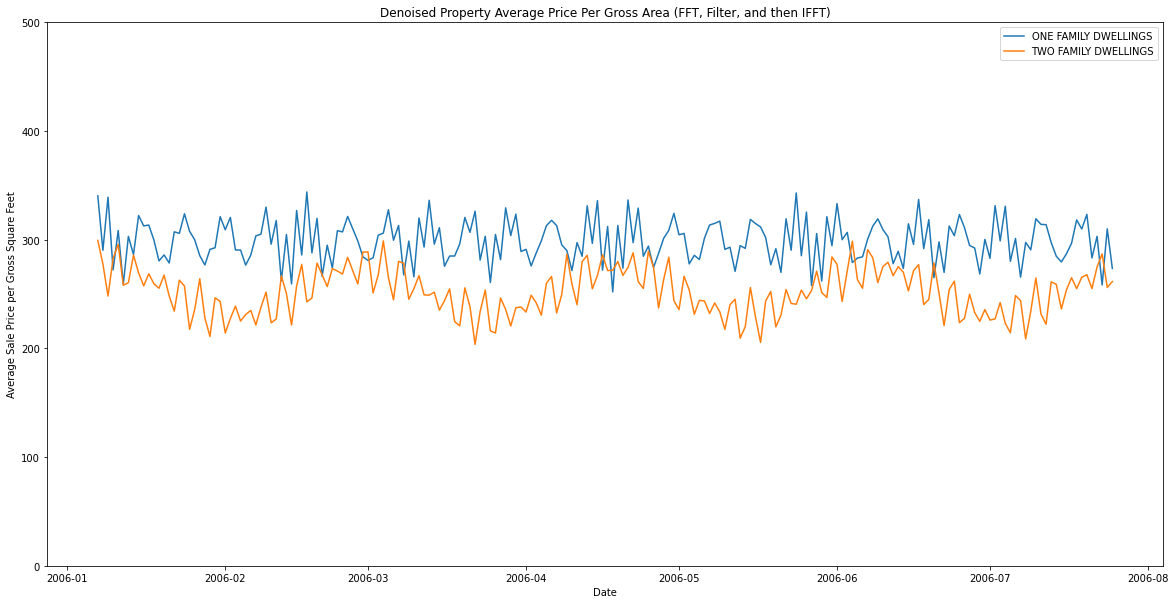

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))
for category in sort_list[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[1000:1200]
    vector = price
    vector_size = len(vector)
    fft_result = np.fft.fft(vector)
    indices_of_largest = np.argsort(fft_result)[-7:]
    new_array = np.zeros_like(fft_result)
    new_array[indices_of_largest] = fft_result[indices_of_largest]
    ifft_result = np.fft.ifft(new_array)
    plt.plot(price.index, ifft_result, label=category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Denoised Property Average Price Per Gross Area (FFT, Filter, and then IFFT)'.replace("."," "))
plt.ylim([0,500])
plt.legend()
# plt.savefig(title)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


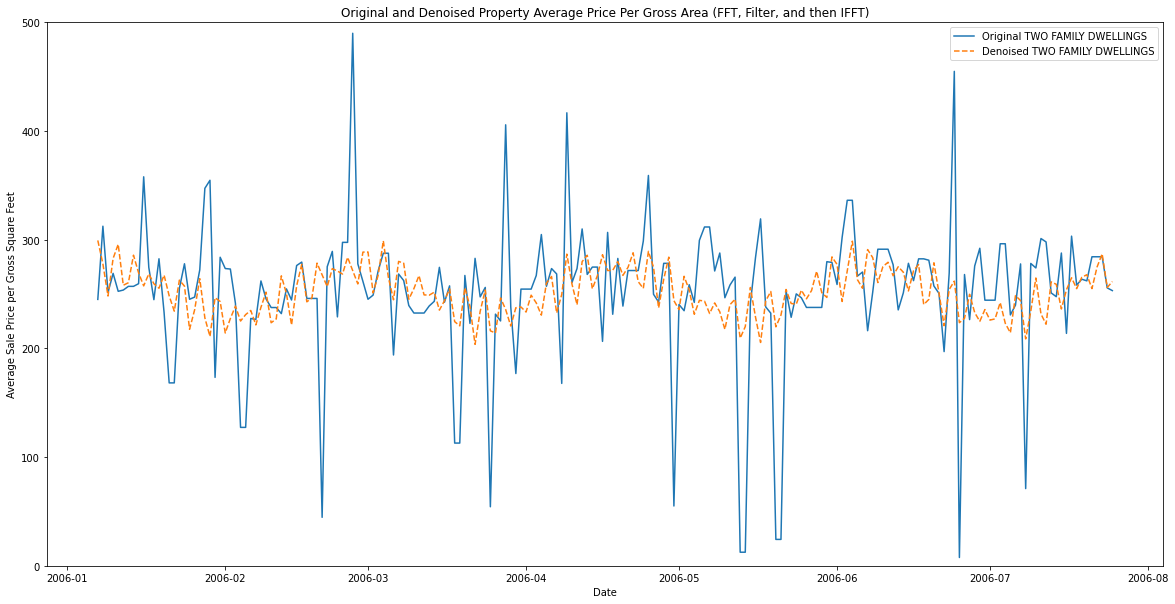

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in sort_list[1:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[1000:1200]
    plt.plot(price.index, price, label="Original "+category)
    vector = price
    vector_size = len(vector)
    fft_result = np.fft.fft(vector)
    indices_of_largest = np.argsort(fft_result)[-7:]
    new_array = np.zeros_like(fft_result)
    new_array[indices_of_largest] = fft_result[indices_of_largest]
    ifft_result = np.fft.ifft(new_array)
    plt.plot(price.index, ifft_result, linestyle='--', label="Denoised "+category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Original and Denoised Property Average Price Per Gross Area (FFT, Filter, and then IFFT)'.replace("."," "))
plt.ylim([0,500])
plt.legend()
# plt.savefig(title)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


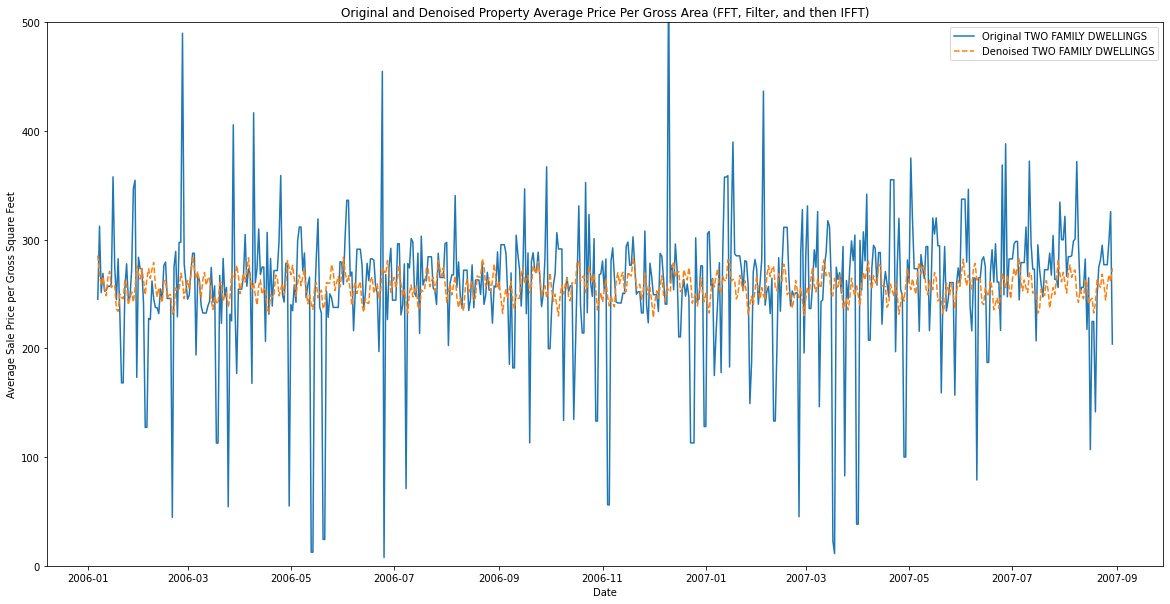

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in sort_list[1:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[1000:1600]
    plt.plot(price.index, price, label="Original "+category)
    vector = price
    vector_size = len(vector)
    fft_result = np.fft.fft(vector)
    indices_of_largest = np.argsort(fft_result)[-7:]
    new_array = np.zeros_like(fft_result)
    new_array[indices_of_largest] = fft_result[indices_of_largest]
    ifft_result = np.fft.ifft(new_array)
    plt.plot(price.index, ifft_result, linestyle='--', label="Denoised "+category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Original and Denoised Property Average Price Per Gross Area (FFT, Filter, and then IFFT)'.replace("."," "))
plt.ylim([0,500])
plt.legend()
# plt.savefig(title)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


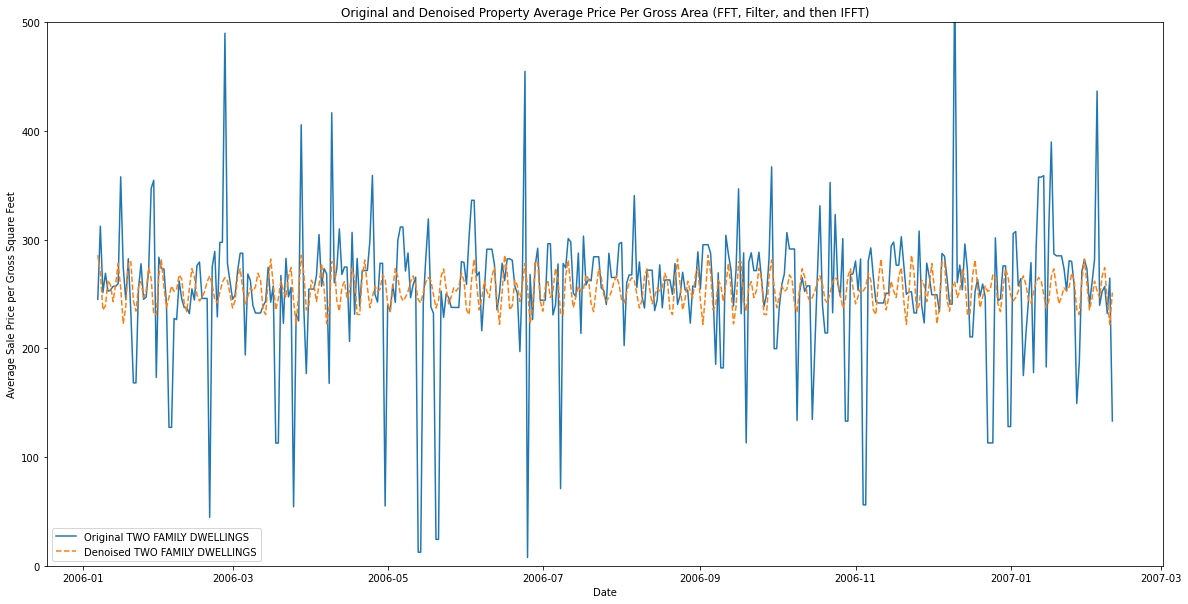

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in sort_list[1:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[1000:1400]
    plt.plot(price.index, price, label="Original "+category)
    vector = price
    vector_size = len(vector)
    fft_result = np.fft.fft(vector)
    indices_of_largest = np.argsort(fft_result)[-7:]
    new_array = np.zeros_like(fft_result)
    new_array[indices_of_largest] = fft_result[indices_of_largest]
    ifft_result = np.fft.ifft(new_array)
    plt.plot(price.index, ifft_result, linestyle='--', label="Denoised "+category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Original and Denoised Property Average Price Per Gross Area (FFT, Filter, and then IFFT)'.replace("."," "))
plt.ylim([0,500])
plt.legend()
# plt.savefig(title)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


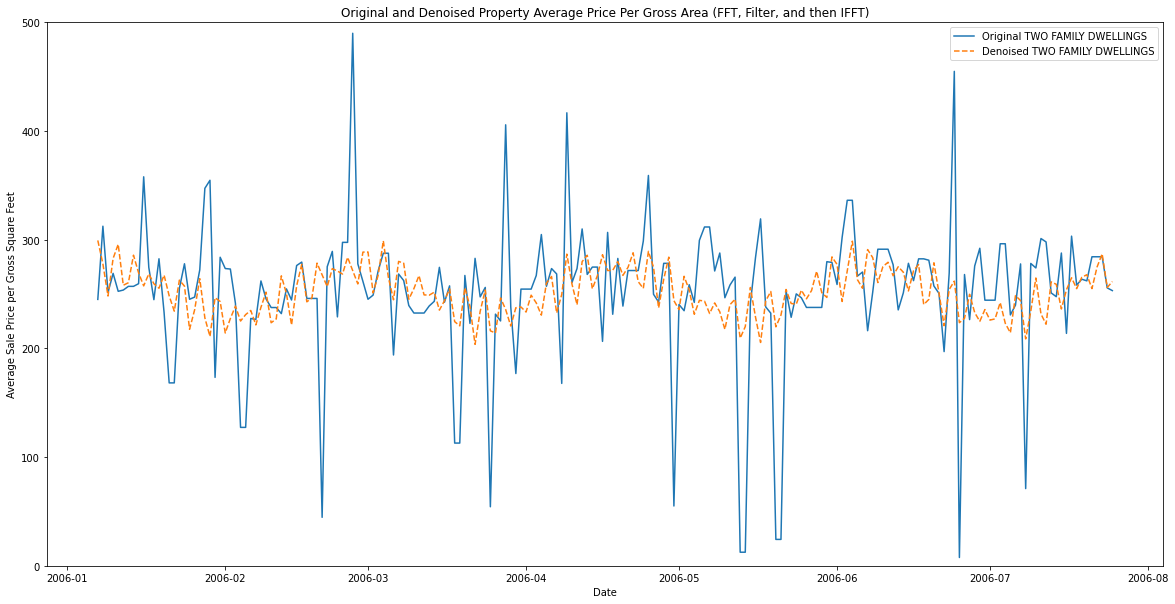

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in sort_list[1:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[1000:1200]
    plt.plot(price.index, price, label="Original "+category)
    vector = price
    vector_size = len(vector)
    fft_result = np.fft.fft(vector)
    indices_of_largest = np.argsort(fft_result)[-7:]
    new_array = np.zeros_like(fft_result)
    new_array[indices_of_largest] = fft_result[indices_of_largest]
    ifft_result = np.fft.ifft(new_array)
    plt.plot(price.index, ifft_result, linestyle='--', label="Denoised "+category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Original and Denoised Property Average Price Per Gross Area (FFT, Filter, and then IFFT)'.replace("."," "))
plt.ylim([0,500])
plt.legend()
# plt.savefig(title)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


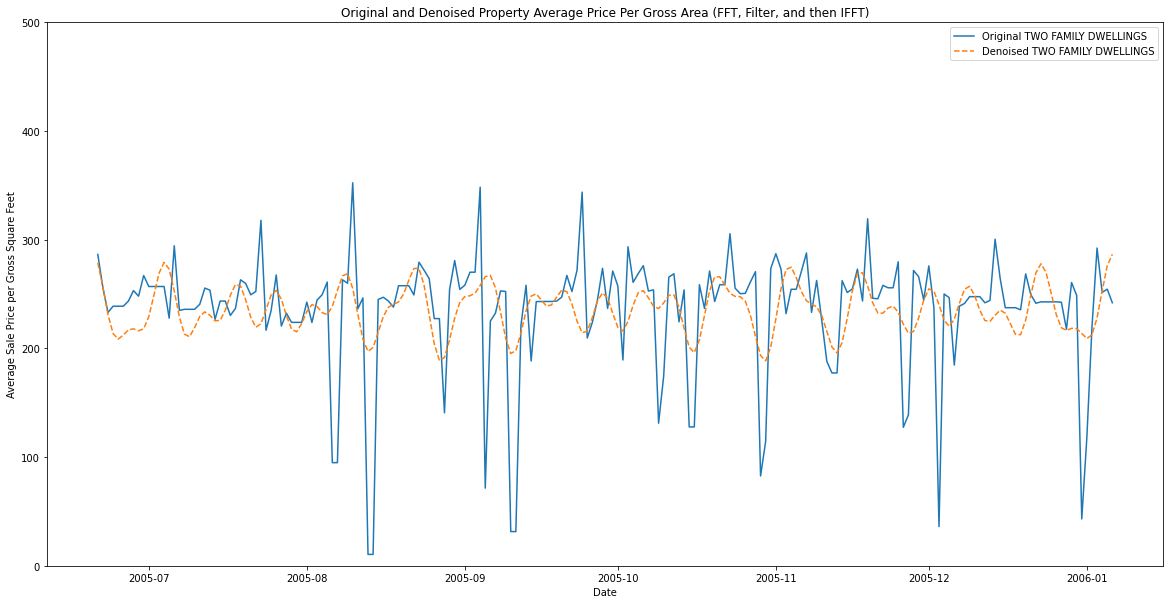

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in sort_list[1:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[800:1000]
    plt.plot(price.index, price, label="Original "+category)
    vector = price
    vector_size = len(vector)
    fft_result = np.fft.fft(vector)
    indices_of_largest = np.argsort(fft_result)[-7:]
    new_array = np.zeros_like(fft_result)
    new_array[indices_of_largest] = fft_result[indices_of_largest]
    ifft_result = np.fft.ifft(new_array)
    plt.plot(price.index, ifft_result, linestyle='--', label="Denoised "+category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Original and Denoised Property Average Price Per Gross Area (FFT, Filter, and then IFFT)'.replace("."," "))
plt.ylim([0,500])
plt.legend()
# plt.savefig(title)
plt.show()

ValueError: Invalid number of FFT data points (0) specified.

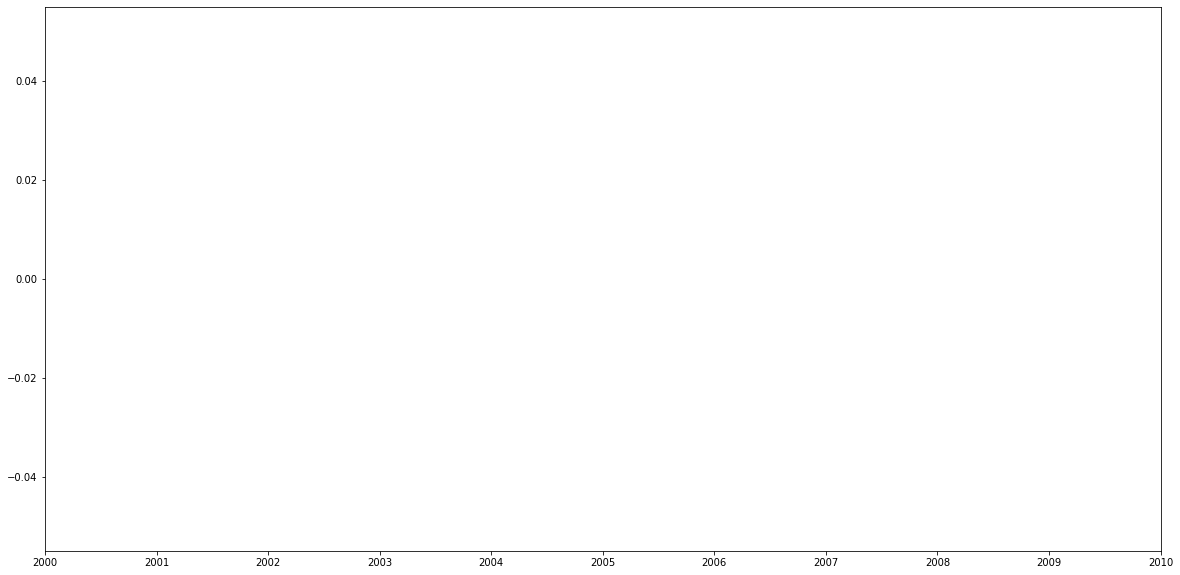

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in sort_list[1:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[6800:7000]
    plt.plot(price.index, price, label="Original "+category)
    vector = price
    vector_size = len(vector)
    fft_result = np.fft.fft(vector)
    indices_of_largest = np.argsort(fft_result)[-7:]
    new_array = np.zeros_like(fft_result)
    new_array[indices_of_largest] = fft_result[indices_of_largest]
    ifft_result = np.fft.ifft(new_array)
    plt.plot(price.index, ifft_result, linestyle='--', label="Denoised "+category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Original and Denoised Property Average Price Per Gross Area (FFT, Filter, and then IFFT)'.replace("."," "))
plt.ylim([0,500])
plt.legend()
# plt.savefig(title)
plt.show()

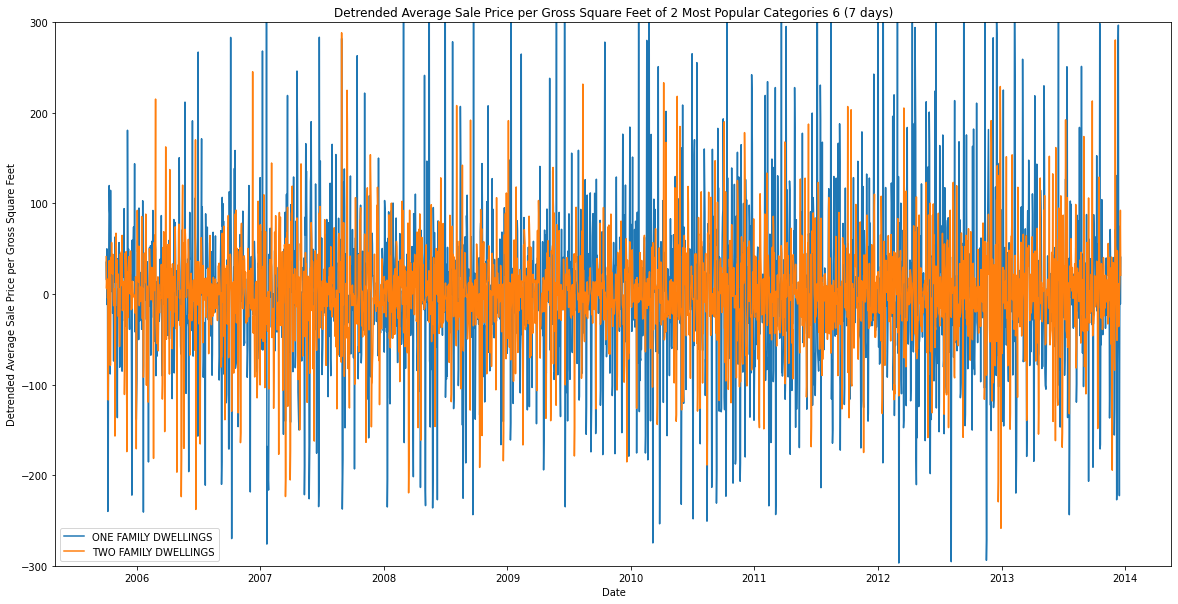

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    window_size = 7
    price = price[window_size-1:] - moving_average(price, window_size)
    price = price[1000:4000]
    plt.plot(price.index, price, label=category)
plt.xlabel('Date')
plt.ylabel('Detrended Average Sale Price per Gross Square Feet')
plt.title(title := f'Detrended Average Sale Price per Gross Square Feet of 2 Most Popular Categories 6 (7 days)'.replace("."," "))
plt.ylim([-300,300])
plt.legend()
plt.savefig(title)
plt.show()

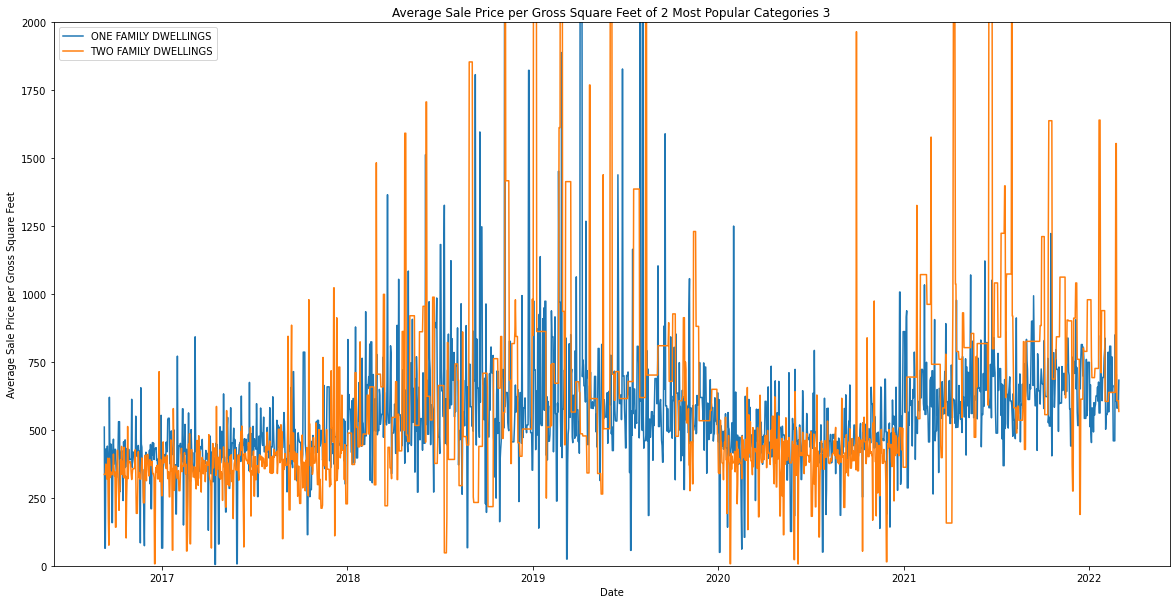

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[5000:7000]
    plt.plot(price.index, price, label=category)
plt.xlabel('Date')
plt.ylabel('Average Sale Price per Gross Square Feet')
plt.title(title := f'Average Sale Price per Gross Square Feet of 2 Most Popular Categories 3'.replace("."," "))
plt.ylim([0,2000])
plt.legend()
plt.savefig(title)
plt.show()

In [118]:
df_pivot

UPPER BUILDING CLASS NAME  ASYLUMS AND HOMES  CONDOMINIUMS  \
DATE                                                         
2003-01-01                               NaN           NaN   
2003-01-02                               NaN           NaN   
2003-01-03                               NaN           NaN   
2003-01-04                               NaN           NaN   
2003-01-05                               NaN           NaN   
...                                      ...           ...   
2023-03-27                        430.070532           NaN   
2023-03-28                               NaN      2.792666   
2023-03-29                               NaN           NaN   
2023-03-30                               NaN     46.443742   
2023-03-31                               NaN           NaN   

UPPER BUILDING CLASS NAME  EDUCATIONAL FACILITIES  ELEVATOR APARTMENTS  \
DATE                                                                     
2003-01-01                                    NaN                  NaN   
2003-01-02                                    NaN            83.793413   
2003-01-03                                    NaN                  NaN   
2003-01-04                                    NaN                  NaN   
2003-01-05                                    NaN                  NaN   
...                                           ...                  ...   
2023-03-27                                    NaN                  NaN   
2023-03-28                                    NaN           489.236791   
2023-03-29                                    NaN           108.797016   
2023-03-30                                    NaN                  NaN   
2023-03-31                            1760.918613            20.314781   

UPPER BUILDING CLASS NAME  FACTORIES AND INDUSTRIAL BUILDINGS      GARAGES  \
DATE                                                                         
2003-01-01                                                NaN          NaN   
2003-01-02                                                NaN   199.754070   
2003-01-03                                                NaN  1614.256496   
2003-01-04                                                NaN          NaN   
2003-01-05                                                NaN          NaN   
...                                                       ...          ...   
2023-03-27                                                NaN          NaN   
2023-03-28                                                NaN          NaN   
2023-03-29                                         416.666667   977.272727   
2023-03-30                                         439.648281          NaN   
2023-03-31                                       14661.323429          NaN   

UPPER BUILDING CLASS NAME  GOVERNMENT/CITY DEPARTMENTS  \
DATE                                                     
2003-01-01                                         NaN   
2003-01-02                                         NaN   
2003-01-03                                         NaN   
2003-01-04                                         NaN   
2003-01-05                                         NaN   
...                                                ...   
2023-03-27                                         NaN   
2023-03-28                                         NaN   
2023-03-29                                         NaN   
2023-03-30                                         NaN   
2023-03-31                                         NaN   

UPPER BUILDING CLASS NAME  HOSPITALS AND HEALTH FACILITIES  HOTELS  \
DATE                                                                 
2003-01-01                                             NaN     NaN   
2003-01-02                                             NaN     NaN   
2003-01-03                                             NaN     NaN   
2003-01-04                                             NaN     NaN   
2003-01-05                              

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
n = 28
k = 5500
category = ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[0]
# Sample time series data
df = df_pivot[[category]][k:k+3*365]
date_range = pd.date_range(start=min(df.index), end=max(df.index), freq='D')
df = df.reindex(date_range)
df = df.ffill()[15:]
min_date = str(min(df.index))
max_date = str(max(df.index))
# Perform seasonal decomposition
result = seasonal_decompose(df, model='additive', period=7)  # You may need to adjust the period
date = df.index
# Plot the decomposition
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=3.85)
strng = re.sub(r'00:00:00', '', f"{min_date}-{max_date}")
plt.suptitle(title := f"Decomposed Average Price per Gross Area of {category.title()} ({strng})")
plt.subplot(4, 1, 1)
plt.plot(date, df[category], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(date, result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(date, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(date, result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig(title)
plt.show()

NameError: name 'df_pivot' is not defined

In [149]:
((df_pivot.isna().sum()/len(df_pivot)).sort_values())

UPPER BUILDING CLASS NAME
ASYLUMS AND HOMES                            0.000000
MISC. BUILDING CLASSIFICATIONS               0.000000
CONDOMINIUMS                                 0.000000
EDUCATIONAL FACILITIES                       0.000000
ELEVATOR APARTMENTS                          0.000000
FACTORIES AND INDUSTRIAL BUILDINGS           0.000000
GARAGES                                      0.000000
GOVERNMENT/CITY DEPARTMENTS                  0.000000
HOSPITALS AND HEALTH FACILITIES              0.000000
HOTELS                                       0.000000
INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES    0.000000
WAREHOUSES                                   0.000000
LOFTS                                        0.000000
WALK UP APARTMENTS                           0.000000
ONE FAMILY DWELLINGS                         0.000000
OUTDOOR RECREATIONAL FACILITIES              0.000000
PRIMARILY RES. - MIXED USE                   0.000000
RELIGIOUS FACILITIES                         0.000000
ST

In [147]:
df_pivot = df_pivot.ffill()[((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index][100:]
df_pivot

UPPER BUILDING CLASS NAME  ASYLUMS AND HOMES  VACANT LAND  \
DATE                                                        
2003-08-02                        169.204738   473.604380   
2003-08-03                        169.204738   473.604380   
2003-08-04                        169.204738   135.321439   
2003-08-05                        937.500000    90.627618   
2003-08-06                        937.500000   140.694993   
...                                      ...          ...   
2023-03-27                        430.070532   457.435547   
2023-03-28                        430.070532   457.435547   
2023-03-29                        430.070532   457.435547   
2023-03-30                        430.070532   457.435547   
2023-03-31                        430.070532   457.435547   

UPPER BUILDING CLASS NAME  TWO FAMILY DWELLINGS  TRANSPORTATION FACILITIES  \
DATE                                                                         
2003-08-02                           154.698582                   8.333333   
2003-08-03                           132.676788                   8.333333   
2003-08-04                           158.632887                   8.333333   
2003-08-05                           162.095819                   8.333333   
2003-08-06                           182.596032                   8.333333   
...                                         ...                        ...   
2023-03-27                           556.909261                   0.295578   
2023-03-28                           450.692511                   0.295578   
2023-03-29                           425.065244                   0.295578   
2023-03-30                           590.910781                   0.295578   
2023-03-31                           411.838616               28269.230769   

UPPER BUILDING CLASS NAME     THEATRES  STORE BUILDINGS  RELIGIOUS FACILITIES  \
DATE                                                                            
2003-08-02                 1729.438893       210.648387            158.361486   
2003-08-03                 1729.438893       210.648387            158.361486   
2003-08-04                 1729.438893       273.307292             54.687500   
2003-08-05                 1729.438893       198.367127             54.687500   
2003-08-06                 1729.438893       255.814585             86.904762   
...                                ...              ...                   ...   
2023-03-27                 1473.608025       289.317507           1248.439451   
2023-03-28                 1473.608025       430.025445           1248.439451   
2023-03-29                 1473.608025       646.854811           1248.439451   
2023-03-30                 1473.608025     16705.003292            563.967077   
2023-03-31                 1473.608025       602.125148            563.967077   

UPPER BUILDING CLASS NAME  PRIMARILY RES. - MIXED USE  \
DATE                                                    
2003-08-02                                 192.086717   
2003-08-03                                 192.086717   
2003-08-04                                 130.495383   
2003-08-05                                 152.380092   
2003-08-06                                  93.303758   
...                                               ...   
2023-03-27                                1101.190476   
2023-03-28                                 601.621763   
2023-03-29                                 544.801642   
2023-03-30                                 340.725006   
2023-03-31                                 602.322206   

UPPER BUILDING CLASS NAME  OUTDOOR RECREATIONAL FACILITIES  \
DATE                                                         
2003-08-02                                       11.640212   
2003-08-03                                       11.640212   
2003-08-04                                       11.640212   
2003-08-05                                       11.640212   
2003-08-06             

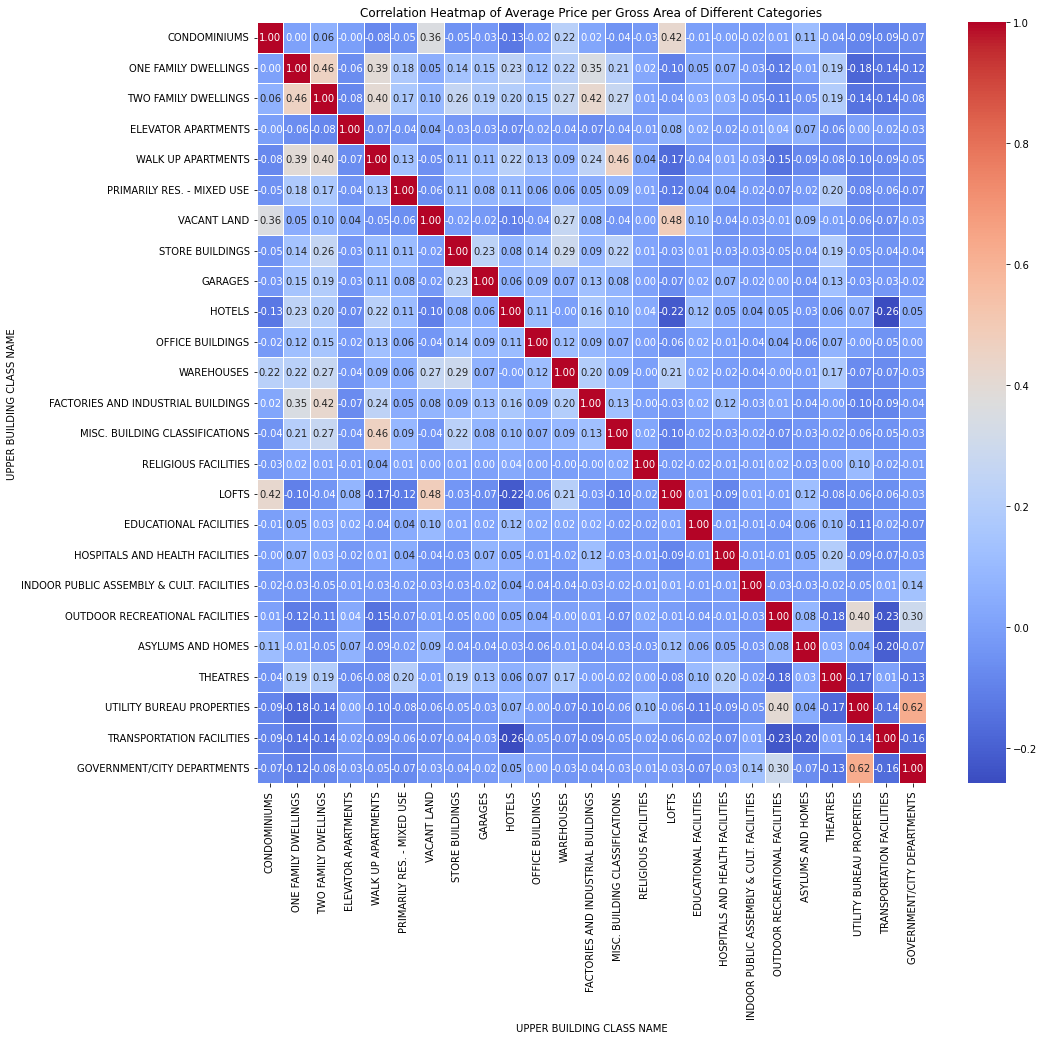

In [151]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
correlation_matrix = df_pivot[category_list].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Average Price per Gross Area of Different Categories')
plt.savefig(title)
plt.show()

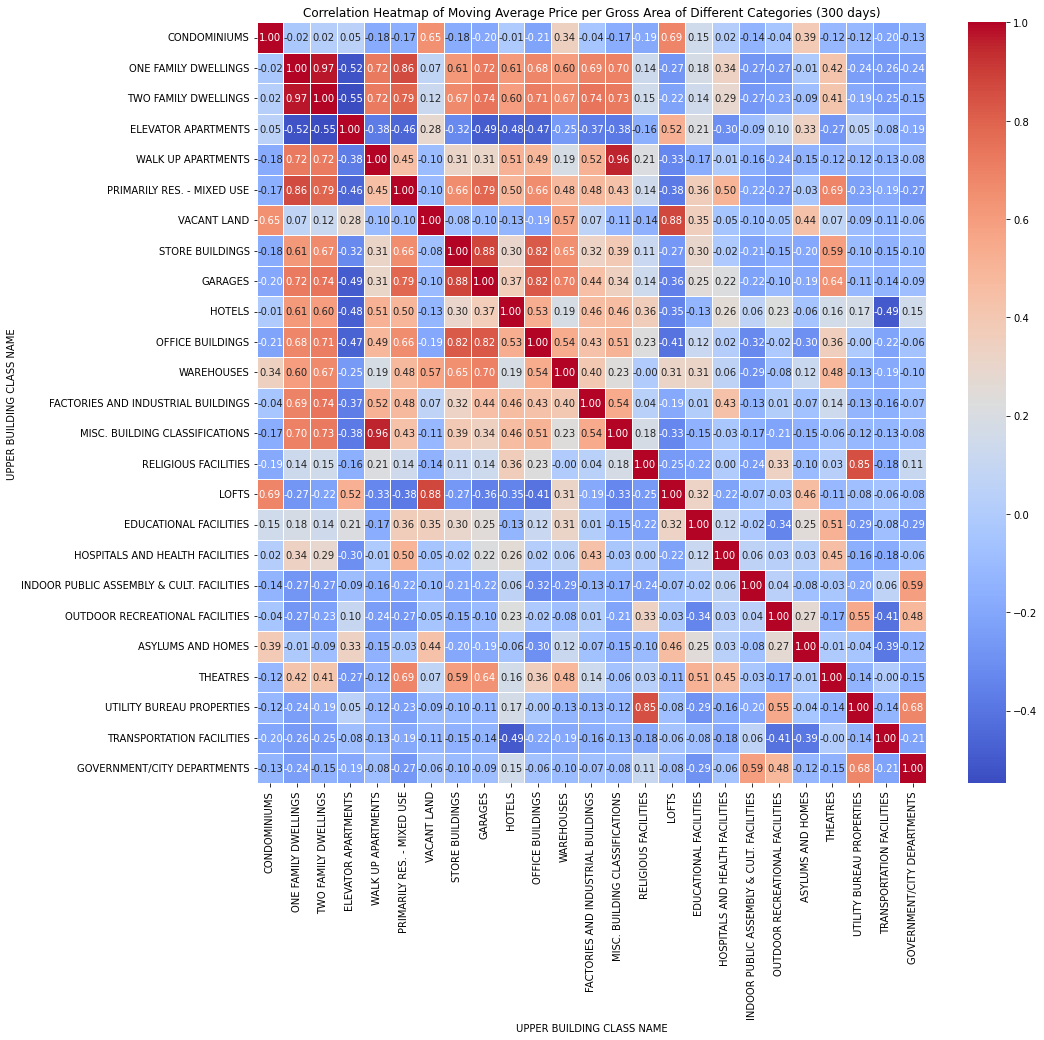

In [156]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)

correlation_matrix = df_pivot[category_list].rolling(window=300).mean().corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Moving Average Price per Gross Area of Different Categories (300 days)')
plt.savefig(title)
plt.show()

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)

correlation_matrix = df_pivot[category_list].rolling(window=300).mean().corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Moving Average Price per Gross Area of Different Categories (300 days)')
plt.savefig(title)
plt.show()

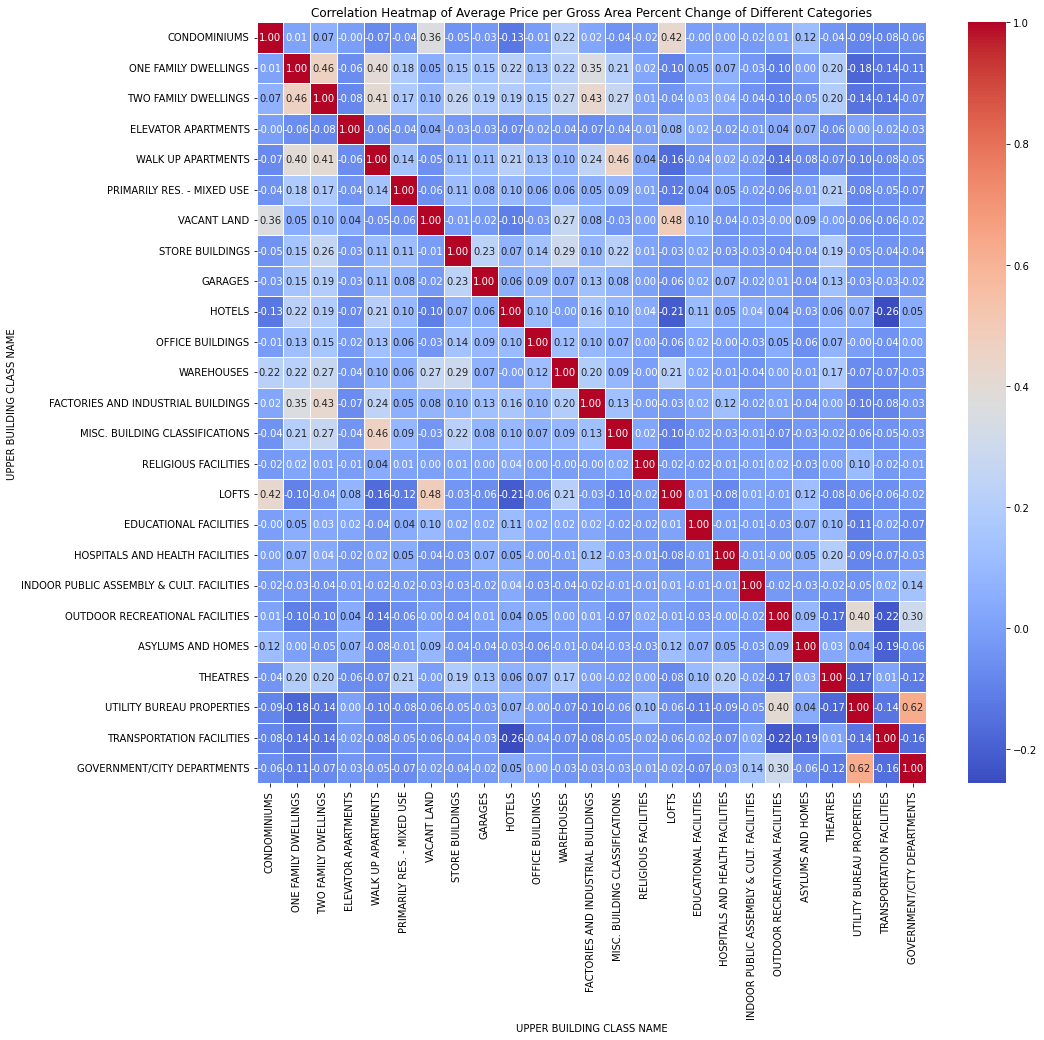

In [175]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
df_pivot = df_pivot[category_list]
correlation_matrix = df_pivot.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Average Price per Gross Area Percent Change of Different Categories')
plt.savefig(title)
plt.show()

In [218]:
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0).drop("UPPER BUILDING CLASS AT TIME OF SALE",axis=1)
df_pivot_2 = df.pivot_table(values='BOROUGH', index='SALE DATE', columns='UPPER BUILDING CLASS NAME')
df_pivot_2 = df_pivot_2.fillna(0)[category_list][102:]
df_pivot_2.columns = [x+" Sale Number" for x in df_pivot_2.columns]
# df_pivot_2 = df_pivot_2[df_pivot_2.index.isin(df_pivot.index)]
df_pivot_2.index = pd.to_datetime(df_pivot_2.index)

In [217]:
df_pivot_2.index

Index(['2003-04-13', '2003-04-14', '2003-04-15', '2003-04-16', '2003-04-17',
       '2003-04-18', '2003-04-19', '2003-04-20', '2003-04-21', '2003-04-22',
       ...
       '2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
       '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29', '2023-09-30'],
      dtype='object', name='SALE DATE', length=7474)

In [211]:
df_pivot.index

DatetimeIndex(['2003-04-13', '2003-04-14', '2003-04-15', '2003-04-16',
               '2003-04-17', '2003-04-18', '2003-04-19', '2003-04-20',
               '2003-04-21', '2003-04-22',
               ...
               '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24',
               '2023-03-25', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31'],
              dtype='datetime64[ns]', name='DATE', length=6423, freq=None)

In [219]:
df = result_df.groupby(['DAY', "MONTH","YEAR","UPPER BUILDING CLASS AT TIME OF SALE"]).sum()
df = df.reset_index(level=['DAY', 'MONTH', 'YEAR', "UPPER BUILDING CLASS AT TIME OF SALE"])
df["UPPER BUILDING CLASS NAME"] = df["UPPER BUILDING CLASS AT TIME OF SALE"].map(building_class_dict_2)
df = df[(df["GROSS SQUARE FEET"]>10)&(df["SALE PRICE"]>10)&(~df["GROSS SQUARE FEET"].isna())&(~df["SALE PRICE"].isna())]
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.sort_values("DATE")
df = df[['DATE', 'GROSS SQUARE FEET',
       'SALE PRICE', 'UPPER BUILDING CLASS NAME']]
df["PRICE PER GROSS AREA"] = df['SALE PRICE']/df['GROSS SQUARE FEET']
df_pivot = pd.pivot_table(df, values='PRICE PER GROSS AREA', index=["DATE"], columns='UPPER BUILDING CLASS NAME').ffill()[100:]
df_pivot.columns = [x+" Avg Price" for x in df_pivot.columns]
df_pivot = df_pivot.merge(df_pivot_2, how="left", left_index=True, right_index=True)
df_pivot

ASYLUMS AND HOMES Avg Price  CONDOMINIUMS Avg Price  \
DATE                                                              
2003-04-13                    84.064327               37.295523   
2003-04-14                    84.064327               37.295523   
2003-04-15                    84.064327               37.295523   
2003-04-16                    84.064327               37.295523   
2003-04-17                    84.064327               37.295523   
...                                 ...                     ...   
2023-03-27                   430.070532             1233.055621   
2023-03-28                   430.070532                2.792666   
2023-03-29                   430.070532                2.792666   
2023-03-30                   430.070532               46.443742   
2023-03-31                   430.070532               46.443742   

            EDUCATIONAL FACILITIES Avg Price  ELEVATOR APARTMENTS Avg Price  \
DATE                                                                          
2003-04-13                        170.454545                    1169.582209   
2003-04-14                        170.454545                      53.105823   
2003-04-15                        170.454545                    1379.158739   
2003-04-16                        170.454545                    1379.158739   
2003-04-17                        170.454545                    1379.158739   
...                                      ...                            ...   
2023-03-27                        335.282651                      13.053978   
2023-03-28                        335.282651                     489.236791   
2023-03-29                        335.282651                     108.797016   
2023-03-30                        335.282651                     108.797016   
2023-03-31                       1760.918613                      20.314781   

            FACTORIES AND INDUSTRIAL BUILDINGS Avg Price  GARAGES Avg Price  \
DATE                                                                          
2003-04-13                                     16.096415         160.038971   
2003-04-14                                     16.096415         134.106808   
2003-04-15                                     16.096415         102.978666   
2003-04-16                                     71.153846         102.978666   
2003-04-17                                     75.292398         217.500000   
...                                                  ...                ...   
2023-03-27                                    467.546755         222.222222   
2023-03-28                                    467.546755         222.222222   
2023-03-29                                    416.666667         977.272727   
2023-03-30                                    439.648281         977.272727   
2023-03-31                                  14661.323429         977.272727   

            GOVERNMENT/CITY DEPARTMENTS Avg Price  \
DATE                                                
2003-04-13                               3.823529   
2003-04-14                               3.823529   
2003-04-15                               3.823529   
2003-04-16                               3.823529   
2003-04-17                               3.823529   
...                                           ...   
2023-03-27                             261.493454   
2023-03-28                             261.493454   
2023-03-29                             261.493454   
2023-03-30                             261.493454   
2023-03-31                             261.493454   

            HOSPITALS AND HEALTH FACILITIES Avg Price  HOTELS Avg Price  \
DATE                                                                      
2003-04-13                                  77.778000        246.507491   
2003-04-14                                  77.778000        246.507491   
2003-04-15                                  77.778000        246.507491   
2003-04-16         

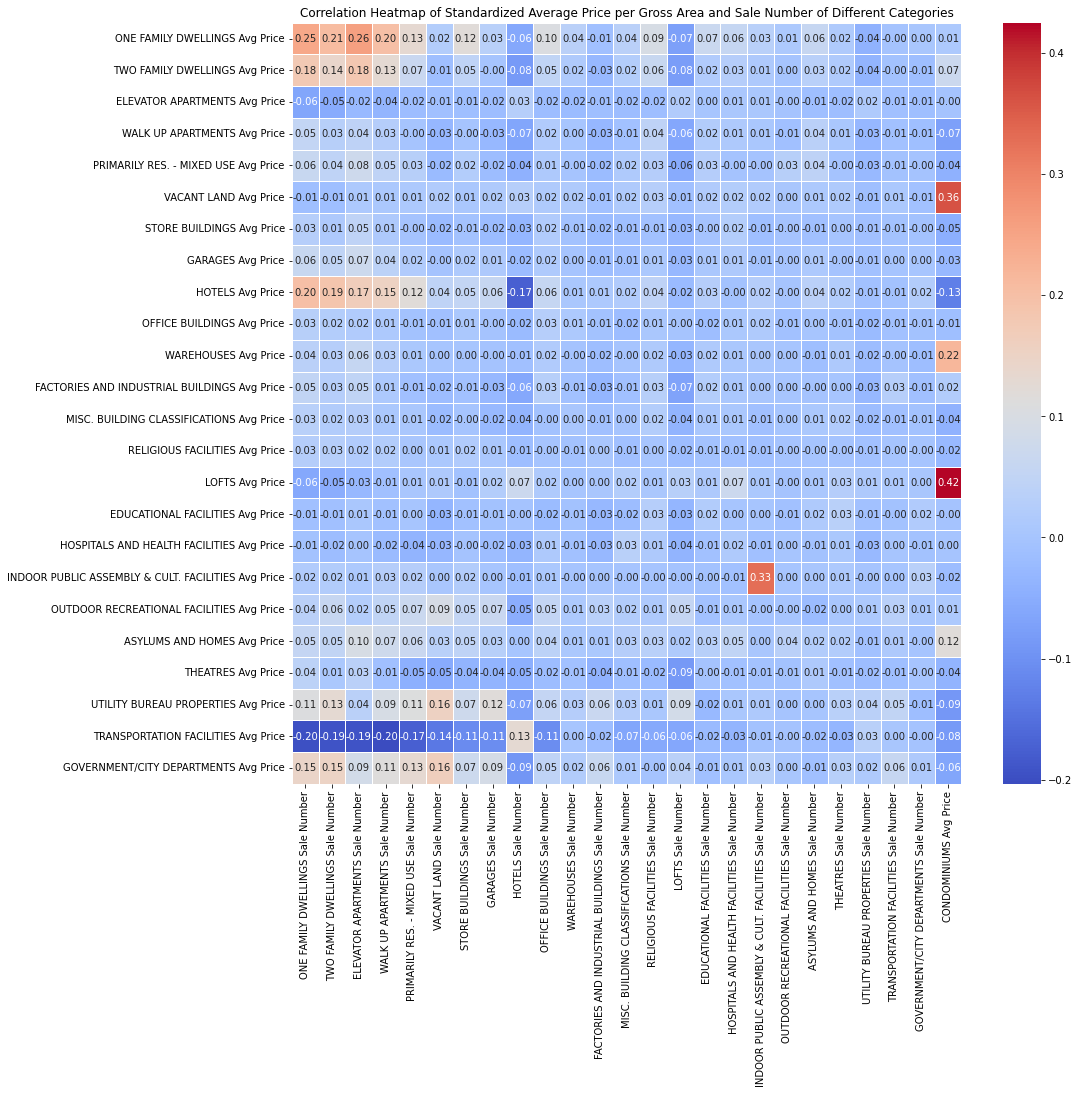

In [226]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
# category_list = [x+" Sale Number" for x in category_list]+[x+" Avg Price" for x in category_list]
df_pivot = df_pivot[category_list]
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_pivot.iloc[:,1:]), columns=df_pivot.columns[1:])
correlation_matrix = df_standardized.corr().iloc[25:,:25]

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Standardized Average Price per Gross Area and Sale Number of Different Categories')
plt.savefig(title)
plt.show()

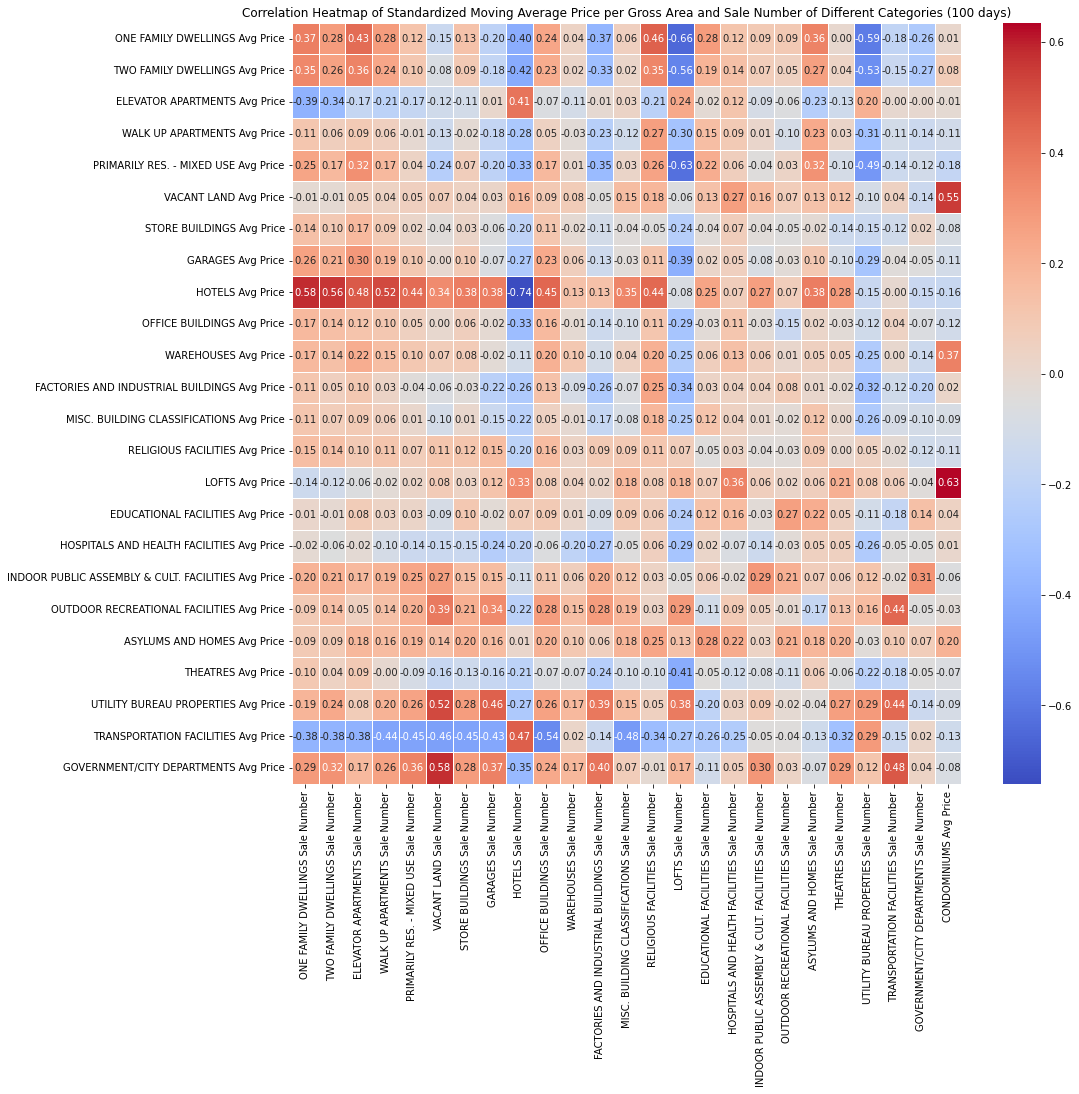

In [234]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
category_list = [x+" Sale Number" for x in category_list]+[x+" Avg Price" for x in category_list]
df_pivot = df_pivot[category_list]
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_pivot.iloc[:,1:]), columns=df_pivot.columns[1:])
correlation_matrix = df_standardized.rolling(window=100).mean().corr().iloc[25:,:25]

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Standardized Moving Average Price per Gross Area and Sale Number of Different Categories (100 days)')
plt.savefig(title)
plt.show()

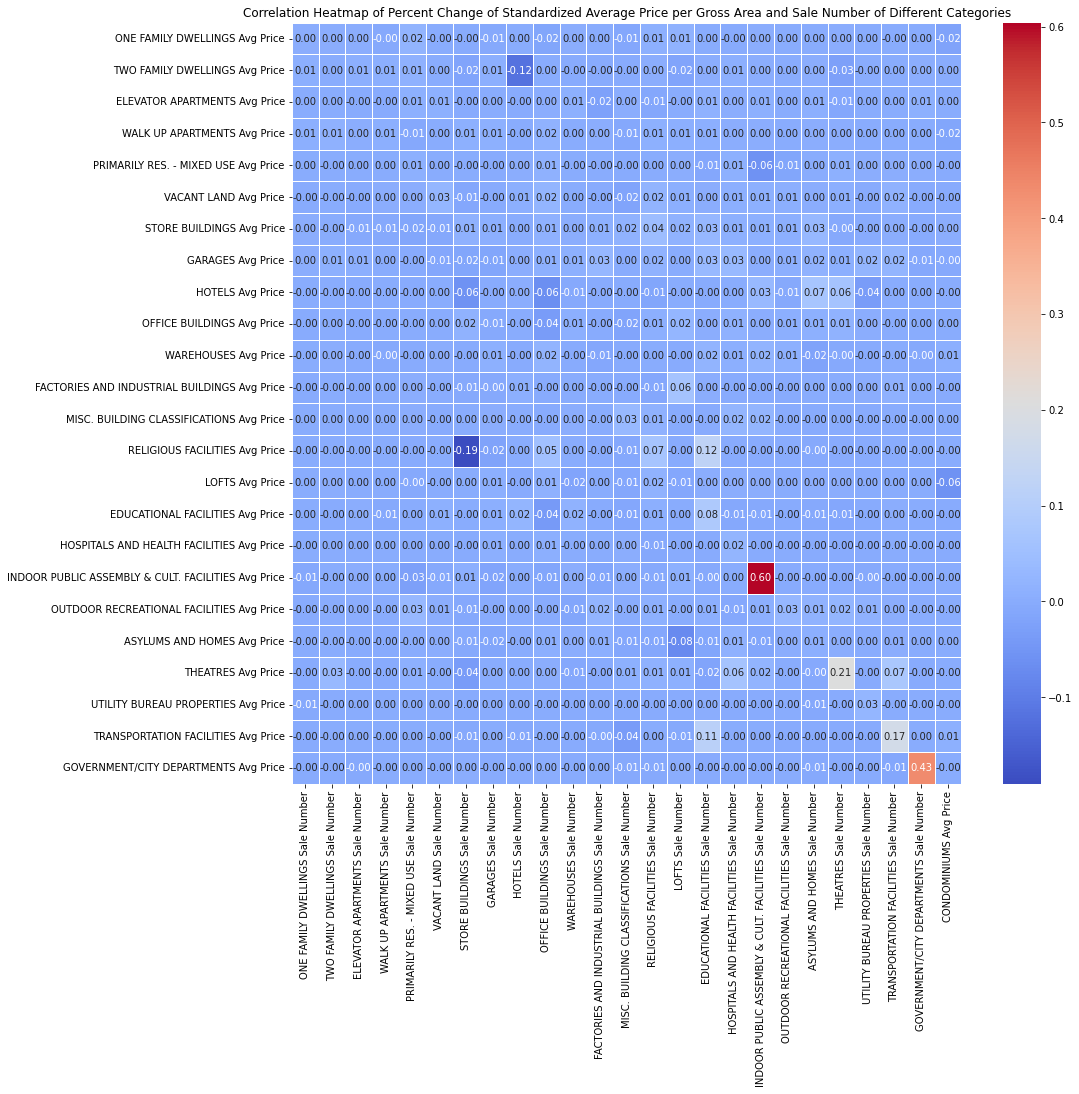

In [227]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
category_list = [x+" Sale Number" for x in category_list]+[x+" Avg Price" for x in category_list]
df_pivot = df_pivot[category_list]
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_pivot.iloc[:,1:]), columns=df_pivot.columns[1:])
correlation_matrix = df_standardized.pct_change().corr().iloc[25:,:25]

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Percent Change of Standardized Average Price per Gross Area and Sale Number of Different Categories')
plt.savefig(title)
plt.show()

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
category_list = [x+" Sale Number" for x in category_list]+[x+" Avg Price" for x in category_list]
df_pivot = df_pivot[category_list]
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_pivot.iloc[:,1:]), columns=df_pivot.columns[1:])
correlation_matrix = df_standardized.pct_change().corr().iloc[25:,:25]

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Standardized Average Price per Gross Area and Sale Number of Different Categories')
plt.savefig(title)
plt.show()

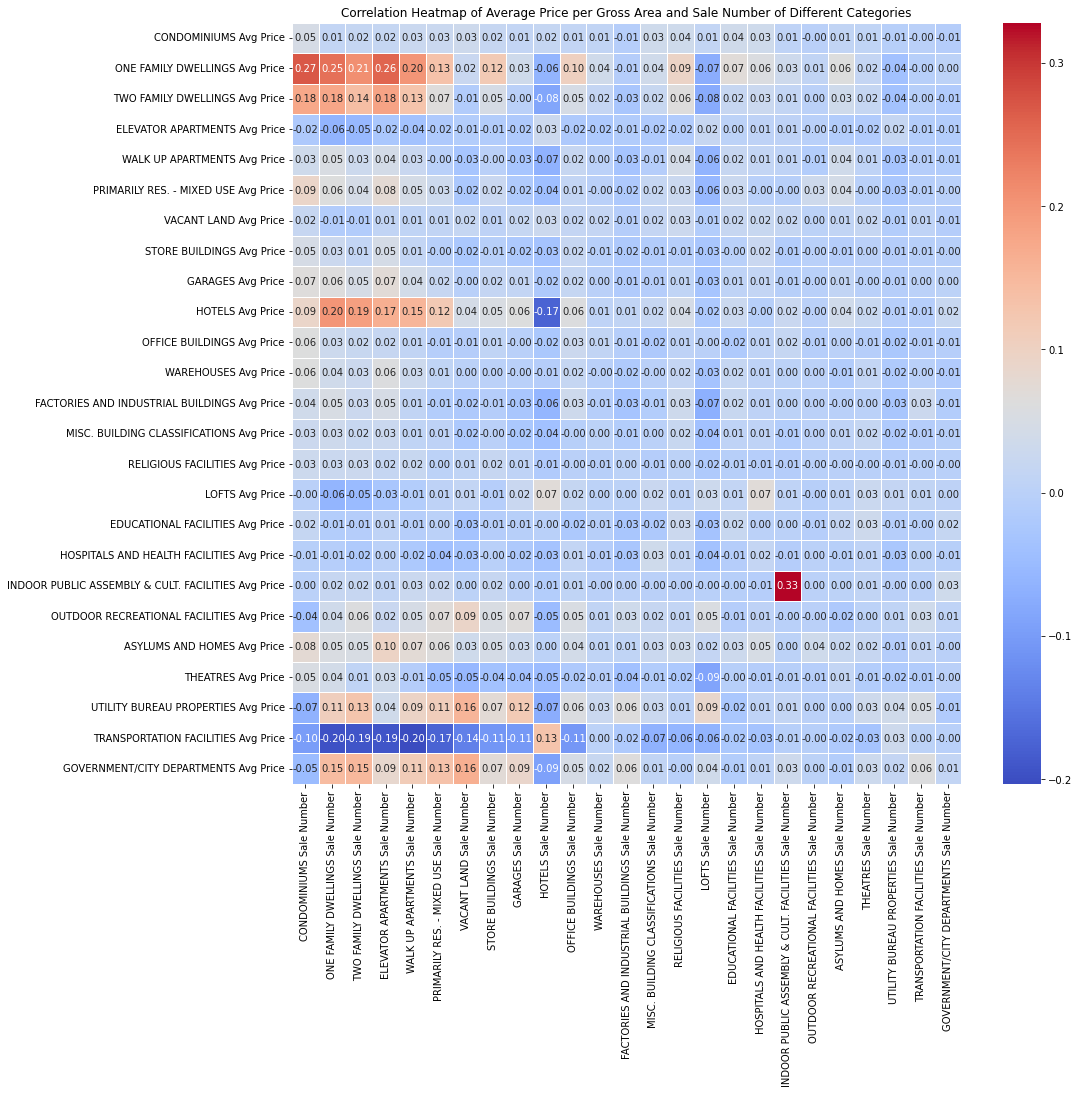

In [225]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
category_list = [x+" Sale Number" for x in category_list]+[x+" Avg Price" for x in category_list]
df_pivot = df_pivot[category_list]
correlation_matrix = df_pivot.corr().iloc[25:,:25]

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Average Price per Gross Area and Sale Number of Different Categories')
plt.savefig(title)
plt.show()

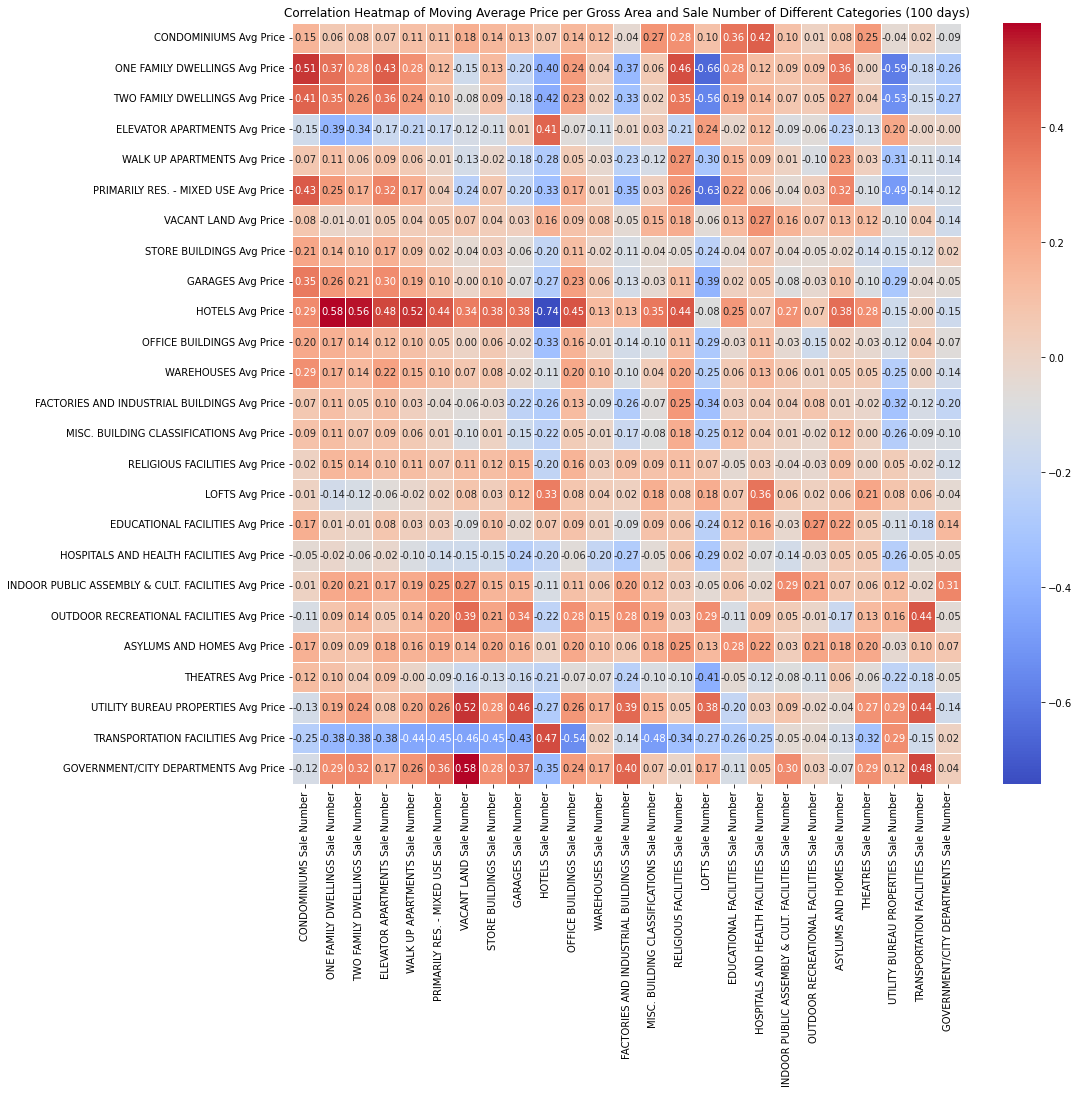

In [232]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
category_list = [x+" Sale Number" for x in category_list]+[x+" Avg Price" for x in category_list]
df_pivot = df_pivot[category_list]
correlation_matrix = df_pivot.rolling(window=100).mean().corr().iloc[25:,:25]

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Moving Average Price per Gross Area and Sale Number of Different Categories (100 days)')
plt.savefig(title)
plt.show()

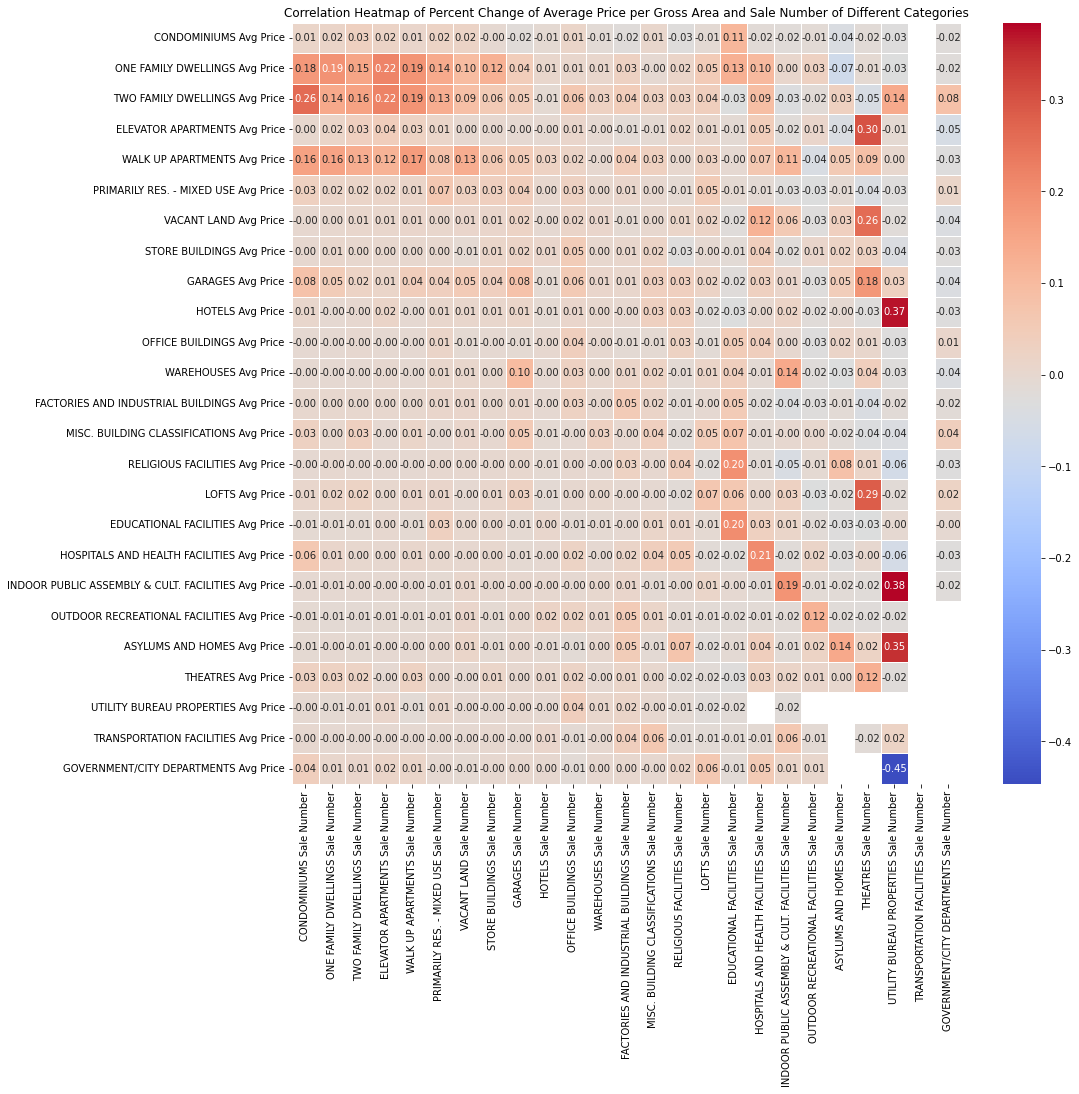

In [228]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
category_list = [x+" Sale Number" for x in category_list]+[x+" Avg Price" for x in category_list]
df_pivot = df_pivot[category_list]
correlation_matrix = df_pivot.pct_change().corr().iloc[25:,:25]

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Percent Change of Average Price per Gross Area and Sale Number of Different Categories')
plt.savefig(title)
plt.show()

In [188]:
from datetime import datetime

# Define two date strings
date_str1 = '2003-04-13'
date_str2 = '2023-03-31'

# Convert date strings to datetime objects
date_format = '%Y-%m-%d'
date1 = datetime.strptime(date_str1, date_format)
date2 = datetime.strptime(date_str2, date_format)

# Calculate the difference in days
days_difference = (date2 - date1).days
days_difference

7292

In [ ]:
df_pivot_2

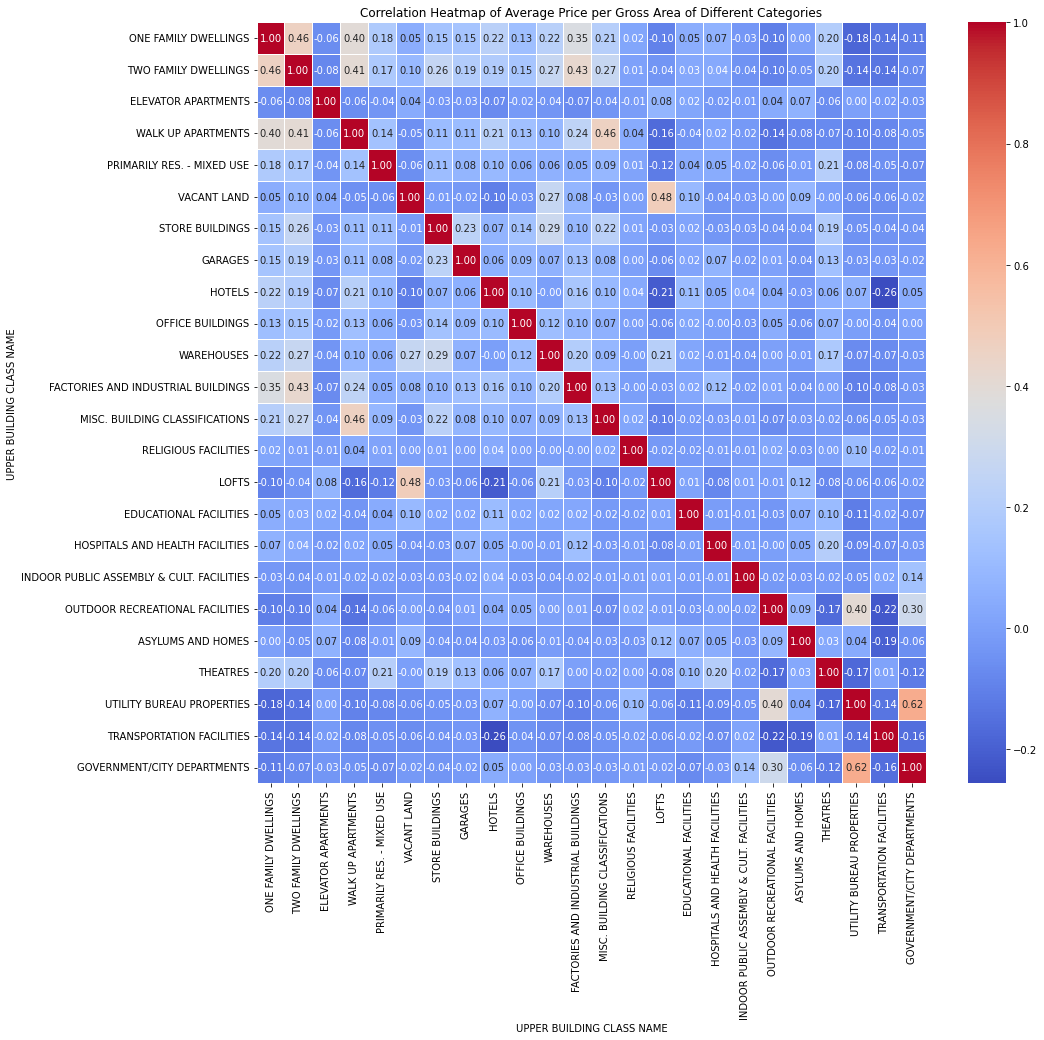

In [174]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
df_pivot = df_pivot[category_list]
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_pivot.iloc[:,1:]), columns=df_pivot.columns[1:])
correlation_matrix = df_standardized.pct_change().corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:='Correlation Heatmap of Average Price per Gross Area of Different Categories')
plt.savefig(title)
plt.show()

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
correlation_matrix = df_standardized.pct_change()[category_list].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-0.5, vmax=0.5)
plt.title(title:='Correlation Heatmap of Standardized Sale Number Percent Change of Different Categories')
plt.savefig(title)
plt.show()

In [250]:
df_6 = pd.pivot_table(df, values='PRICE PER GROSS AREA', index=["DATE"], columns='UPPER BUILDING CLASS NAME')
(df_6.iloc[:,1:].isna().sum()/len(df_6)).sort_values()

UPPER BUILDING CLASS NAME
ONE FAMILY DWELLINGS                         0.099034
TWO FAMILY DWELLINGS                         0.223977
WALK UP APARTMENTS                           0.312586
PRIMARILY RES. - MIXED USE                   0.388012
STORE BUILDINGS                              0.472942
ELEVATOR APARTMENTS                          0.634064
GARAGES                                      0.637590
OFFICE BUILDINGS                             0.664572
WAREHOUSES                                   0.714089
FACTORIES AND INDUSTRIAL BUILDINGS           0.727733
VACANT LAND                                  0.728346
HOTELS                                       0.729726
RELIGIOUS FACILITIES                         0.887322
CONDOMINIUMS                                 0.900813
MISC. BUILDING CLASSIFICATIONS               0.913077
LOFTS                                        0.916909
HOSPITALS AND HEALTH FACILITIES              0.944504
EDUCATIONAL FACILITIES                       0.950790
IN

In [277]:
df = result_df.groupby(['DAY', "MONTH","YEAR","UPPER BUILDING CLASS AT TIME OF SALE"]).sum()
df = df.reset_index(level=['DAY', 'MONTH', 'YEAR', "UPPER BUILDING CLASS AT TIME OF SALE"])
df["UPPER BUILDING CLASS NAME"] = df["UPPER BUILDING CLASS AT TIME OF SALE"].map(building_class_dict_2)
df = df[(df["GROSS SQUARE FEET"]>10)&(df["SALE PRICE"]>10)&(~df["GROSS SQUARE FEET"].isna())&(~df["SALE PRICE"].isna())]
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.sort_values("DATE")
df = df[['DATE', 'GROSS SQUARE FEET',
       'SALE PRICE', 'UPPER BUILDING CLASS NAME']]
df["PRICE PER GROSS AREA"] = df['SALE PRICE']/df['GROSS SQUARE FEET']
df_pivot = pd.pivot_table(df, values='PRICE PER GROSS AREA', index=["DATE"], columns='UPPER BUILDING CLASS NAME').ffill()[100:]
df_pivot = df_pivot[list((df_6.iloc[:,1:].isna().sum()/len(df_6)).sort_values().index)[:3]]
df_pivot

UPPER BUILDING CLASS NAME  ONE FAMILY DWELLINGS  TWO FAMILY DWELLINGS  \
DATE                                                                    
2003-04-13                           122.398719            245.090016   
2003-04-14                           195.158857            152.910717   
2003-04-15                           317.906834            136.727930   
2003-04-16                           181.723779            171.199779   
2003-04-17                           181.251609            158.334134   
...                                         ...                   ...   
2023-03-27                           510.164470            556.909261   
2023-03-28                           514.215089            450.692511   
2023-03-29                           741.117730            425.065244   
2023-03-30                           562.107702            590.910781   
2023-03-31                           531.840682            411.838616   

UPPER BUILDING CLASS NAME  WALK UP APARTMENTS  
DATE                                           
2003-04-13                         172.249442  
2003-04-14                         130.350679  
2003-04-15                         146.859142  
2003-04-16                         230.065802  
2003-04-17                          62.434539  
...                                       ...  
2023-03-27                         163.497537  
2023-03-28                         724.008574  
2023-03-29                        1063.664427  
2023-03-30                         679.706693  
2023-03-31                         287.467876  

[6423 rows x 3 columns]

In [257]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

k = 3000
data = df_pivot.iloc[k:k+300,:].astype(float)
order = (p:=21, d:=0, q:=0, s:=7)
model = VARMAX(data, order=order)
results = model.fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


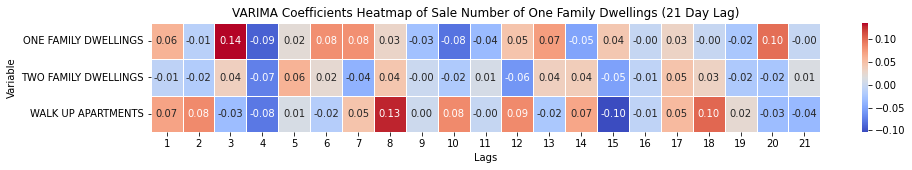

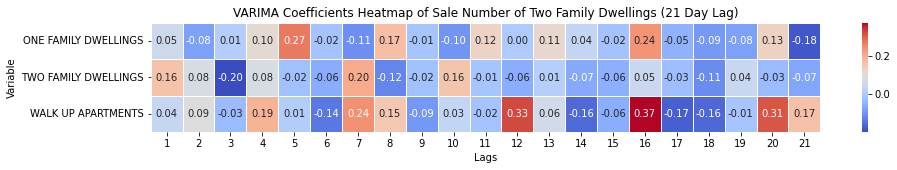

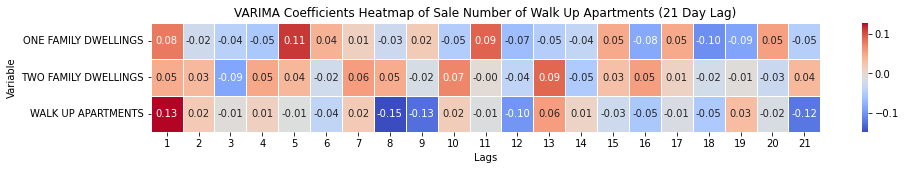

In [279]:
params = results.params
df_para = pd.DataFrame(params)
df_para = df_para[(df_para.index.str.split('.').str.len()==3) & (df_para.index.str.split('.').str[0] != "sqrt")]
df_para["Lags"] = df_para.index.str.split('.').str[0].str[1:].astype(int)
df_para["Feature"] = df_para.index.str.split('.').str[1]
df_para["Variable"] = df_para.index.str.split('.').str[2]
for category in df_pivot.columns:
    df_para_1 = df_para[df_para["Feature"] == category]
    df_pivot_1 = pd.pivot_table(df_para_1, values=0, index='Variable', columns='Lags')
    plt.figure(figsize=(15, 2))
    sns.heatmap(df_pivot_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title:=f'VARIMA Coefficients Heatmap of Sale Number of {category.title()} ({str(max(df_para["Lags"]))} Day Lag)')
    plt.savefig(title)
    plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


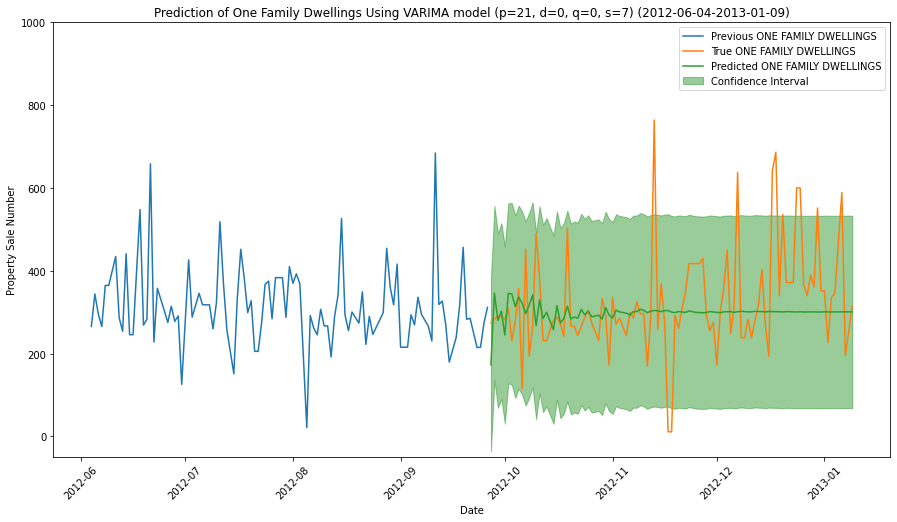

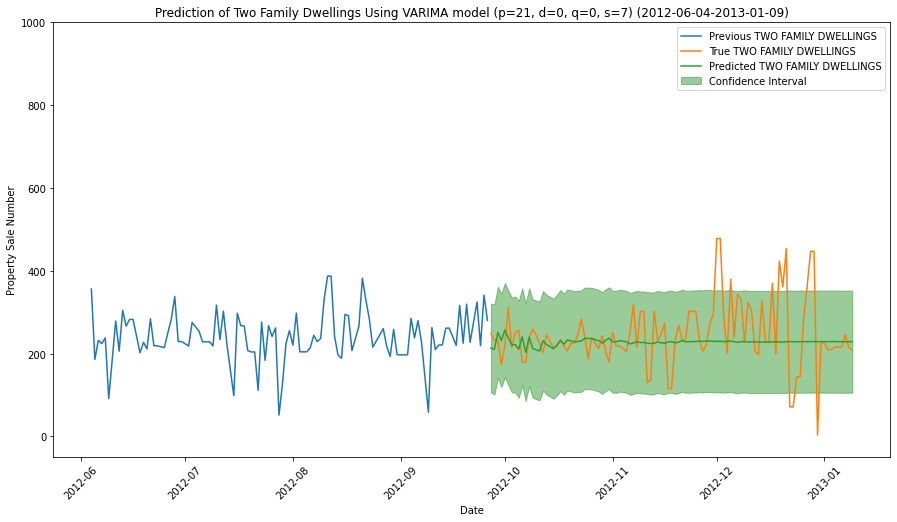

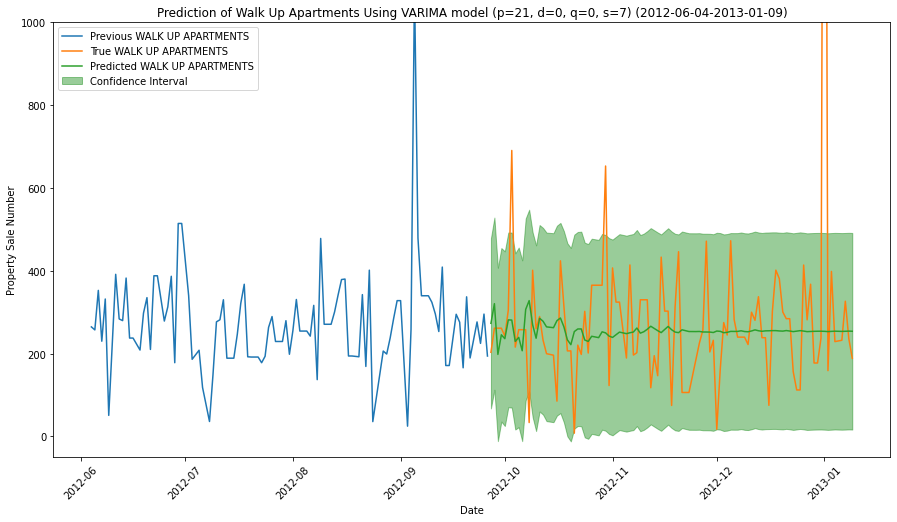

In [305]:
# # Make predictions
forecast = results.get_forecast(steps=100)
predicted_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

for i,category in enumerate(predicted_values.columns):
    plt.figure(figsize=(15, 8))
    k = 3000
    m = 300
    n = 100
    plt.plot(df_pivot.index[k+200:k+m], df_pivot[k+200:k+m][category], label="Previous "+category)
    plt.plot(df_pivot.index[k+m:k+m+n], df_pivot[k+m:k+m+n][category], label="True "+category)
    plt.plot(df_pivot.index[k+m:k+m+n], predicted_values[category], label="Predicted "+category)
    plt.fill_between(df_pivot.index[k+m:k+m+n], forecast_ci.iloc[:, 0+i], forecast_ci.iloc[:, 3+i], color='green', alpha=0.4, label='Confidence Interval')
    plt.xlabel('Date')
    plt.ylabel('Property Sale Number')
    step = 7
    # plt.xticks(range(0, len(df_pivot.index[k+200:k+m+n]), step), list(df_pivot.index[k+200:k+m+n])[::step])
    plt.xticks(rotation=45)
    min_date = str(min(df_pivot.index[k+200:k+m+n]))
    max_date = str(max(df_pivot.index[k+200:k+m+n]))
    plt.title(title:=f'Prediction of {category.title()} Using VARIMA model (p={str(p)}, d={str(d)}, q={str(q)}, s={str(s)}) ({min_date}-{max_date})'.replace(" 00:00:00",""))
    plt.ylim([-50,1000])
    plt.legend()
    plt.savefig(title)
    # Show the plot
    plt.show()

In [284]:
df_pivot.loc[k+200:k+m-1,:]

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [3200] of type int

In [163]:
df = result_df.groupby(['DAY', "MONTH","YEAR","UPPER BUILDING CLASS AT TIME OF SALE"]).sum()
df = df.reset_index(level=['DAY', 'MONTH', 'YEAR', "UPPER BUILDING CLASS AT TIME OF SALE"])
df["UPPER BUILDING CLASS NAME"] = df["UPPER BUILDING CLASS AT TIME OF SALE"].map(building_class_dict_2)
df = df[(df["GROSS SQUARE FEET"]>10)&(df["SALE PRICE"]>10)&(~df["GROSS SQUARE FEET"].isna())&(~df["SALE PRICE"].isna())]
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.sort_values("DATE")
df = df[['DATE', 'GROSS SQUARE FEET',
       'SALE PRICE', 'UPPER BUILDING CLASS NAME']]
df["PRICE PER GROSS AREA"] = df['SALE PRICE']/df['GROSS SQUARE FEET']
df_pivot = pd.pivot_table(df, values='PRICE PER GROSS AREA', index=["DATE"], columns='UPPER BUILDING CLASS NAME')
# df_pivot = df_pivot[df_3["UPPER BUILDING CLASS AT TIME OF SALE"]]
df_pivot = df_pivot.ffill()[100:]#.to_csv("year month sale number of different classes of 20 years.csv")
df_pivot

UPPER BUILDING CLASS NAME  ASYLUMS AND HOMES  CONDOMINIUMS  \
DATE                                                         
2003-04-13                         84.064327     37.295523   
2003-04-14                         84.064327     37.295523   
2003-04-15                         84.064327     37.295523   
2003-04-16                         84.064327     37.295523   
2003-04-17                         84.064327     37.295523   
...                                      ...           ...   
2023-03-27                        430.070532   1233.055621   
2023-03-28                        430.070532      2.792666   
2023-03-29                        430.070532      2.792666   
2023-03-30                        430.070532     46.443742   
2023-03-31                        430.070532     46.443742   

UPPER BUILDING CLASS NAME  EDUCATIONAL FACILITIES  ELEVATOR APARTMENTS  \
DATE                                                                     
2003-04-13                             170.454545          1169.582209   
2003-04-14                             170.454545            53.105823   
2003-04-15                             170.454545          1379.158739   
2003-04-16                             170.454545          1379.158739   
2003-04-17                             170.454545          1379.158739   
...                                           ...                  ...   
2023-03-27                             335.282651            13.053978   
2023-03-28                             335.282651           489.236791   
2023-03-29                             335.282651           108.797016   
2023-03-30                             335.282651           108.797016   
2023-03-31                            1760.918613            20.314781   

UPPER BUILDING CLASS NAME  FACTORIES AND INDUSTRIAL BUILDINGS     GARAGES  \
DATE                                                                        
2003-04-13                                          16.096415  160.038971   
2003-04-14                                          16.096415  134.106808   
2003-04-15                                          16.096415  102.978666   
2003-04-16                                          71.153846  102.978666   
2003-04-17                                          75.292398  217.500000   
...                                                       ...         ...   
2023-03-27                                         467.546755  222.222222   
2023-03-28                                         467.546755  222.222222   
2023-03-29                                         416.666667  977.272727   
2023-03-30                                         439.648281  977.272727   
2023-03-31                                       14661.323429  977.272727   

UPPER BUILDING CLASS NAME  GOVERNMENT/CITY DEPARTMENTS  \
DATE                                                     
2003-04-13                                    3.823529   
2003-04-14                                    3.823529   
2003-04-15                                    3.823529   
2003-04-16                                    3.823529   
2003-04-17                                    3.823529   
...                                                ...   
2023-03-27                                  261.493454   
2023-03-28                                  261.493454   
2023-03-29                                  261.493454   
2023-03-30                                  261.493454   
2023-03-31                                  261.493454   

UPPER BUILDING CLASS NAME  HOSPITALS AND HEALTH FACILITIES      HOTELS  \
DATE                                                                     
2003-04-13                                       77.778000  246.507491   
2003-04-14                                       77.778000  246.507491   
2003-04-15                                       77.778000  246.507491   
2003-04-16                                       77.778000  246.507491   
2003-04-17                   

In [157]:
df_pivot.columns

Index(['ASYLUMS AND HOMES', 'VACANT LAND', 'TWO FAMILY DWELLINGS',
       'TRANSPORTATION FACILITIES', 'THEATRES', 'STORE BUILDINGS',
       'RELIGIOUS FACILITIES', 'PRIMARILY RES. - MIXED USE',
       'OUTDOOR RECREATIONAL FACILITIES', 'ONE FAMILY DWELLINGS',
       'WALK UP APARTMENTS', 'OFFICE BUILDINGS', 'LOFTS',
       'INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES', 'HOTELS',
       'HOSPITALS AND HEALTH FACILITIES', 'GOVERNMENT/CITY DEPARTMENTS',
       'GARAGES', 'FACTORIES AND INDUSTRIAL BUILDINGS', 'ELEVATOR APARTMENTS',
       'EDUCATIONAL FACILITIES', 'CONDOMINIUMS',
       'MISC. BUILDING CLASSIFICATIONS', 'WAREHOUSES',
       'UTILITY BUREAU PROPERTIES'],
      dtype='object', name='UPPER BUILDING CLASS NAME')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


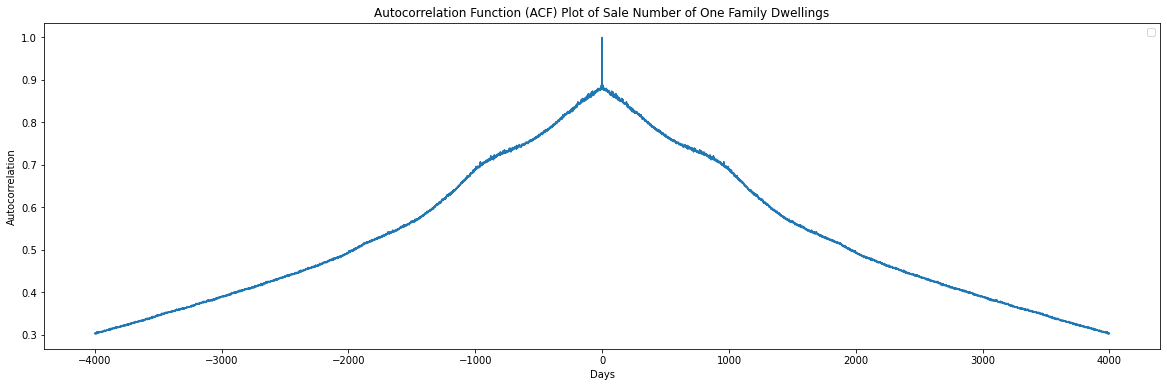

In [168]:
def get_most_central_elements(lst, k):
    midpoint = len(lst) // 2
    start_index = max(0, midpoint - k // 2)
    end_index = min(len(lst), start_index + k)
    central_elements = lst[start_index:end_index]
    return central_elements

def plot_stock_ACF(category):
    plt.figure(figsize=(20, 6))
    vector = df_pivot[category].astype(float)
    autocorrelation = np.correlate(vector, vector, mode='full')
    autocorrelation /= np.max(autocorrelation)
    lags = np.arange(-len(vector) + 1, len(vector))
    days = 8000
    plt.plot(get_most_central_elements(lags,days), get_most_central_elements(autocorrelation,days))
    plt.title(title:=f'Autocorrelation Function (ACF) Plot of Sale Number of {category.title()}')
    plt.xlabel('Days')
    plt.ylabel('Autocorrelation')
    plt.savefig(title+" 2")
    plt.legend()
    plt.show()

plot_stock_ACF("ONE FAMILY DWELLINGS")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


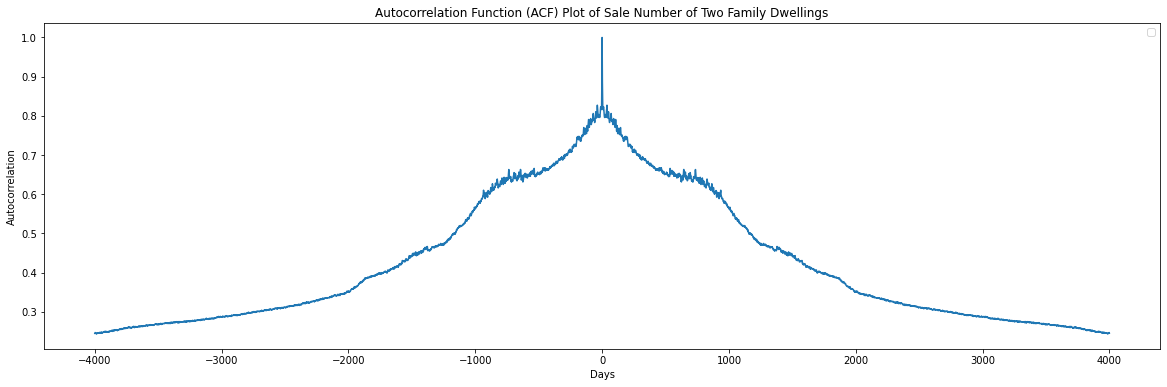

In [169]:
plot_stock_ACF("TWO FAMILY DWELLINGS")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


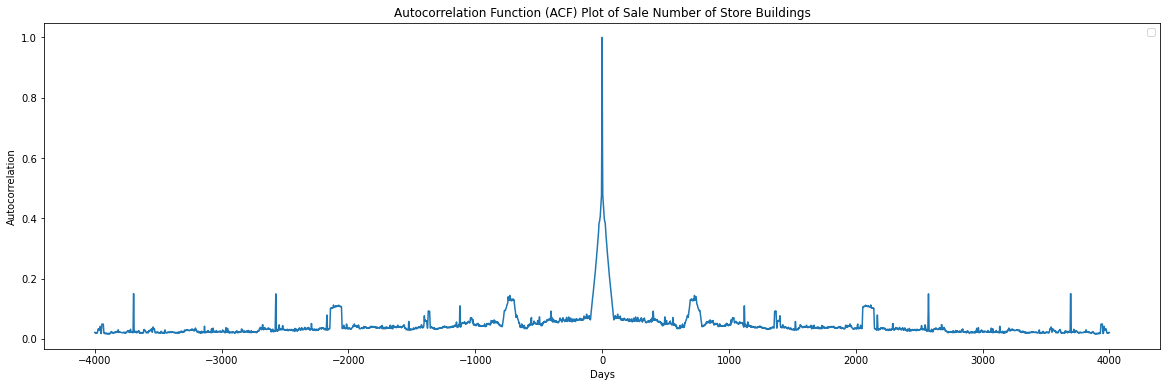

In [170]:
plot_stock_ACF("STORE BUILDINGS")

In [139]:
df[15:].isna()

UPPER BUILDING CLASS NAME  TWO FAMILY DWELLINGS
2019-09-06                                False
2019-09-07                                False
2019-09-08                                False
2019-09-09                                False
2019-09-10                                False
...                                         ...
2023-03-27                                False
2023-03-28                                False
2023-03-29                                False
2023-03-30                                False
2023-03-31                                False

[1303 rows x 1 columns]

In [81]:
def swap_halves(input_array):
    midpoint = len(input_array) // 2
    first_half = input_array[:midpoint]
    second_half = input_array[midpoint:]
    new_array = np.concatenate((second_half, first_half))
    return new_array

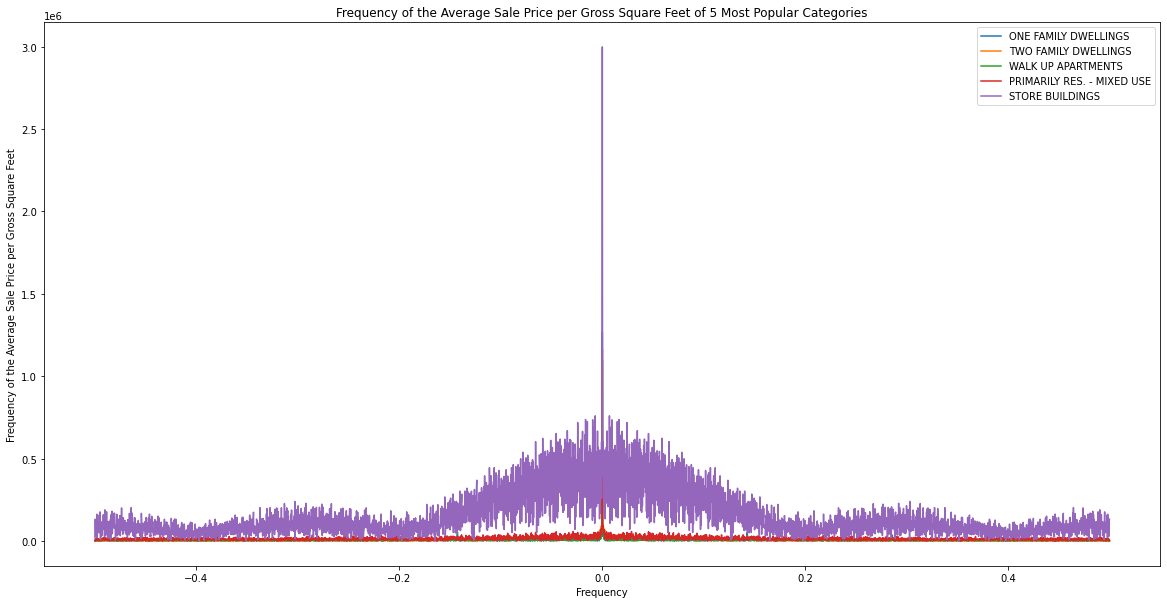

In [92]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:5]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    price = price[1000:5000]
    vector_size = len(price)
    fft_result = swap_halves(np.fft.fft(price))
    fft_freq = swap_halves(np.fft.fftfreq(vector_size,1))
    plt.plot(fft_freq, np.abs(fft_result), label=category)
plt.xlabel('Frequency')
plt.ylabel('Frequency of the Average Sale Price per Gross Square Feet')
plt.title(title := f'Frequency of the Average Sale Price per Gross Square Feet of 5 Most Popular Categories'.replace("."," "))
# plt.ylim([0,2000])
plt.legend()
plt.savefig(title)
plt.show()

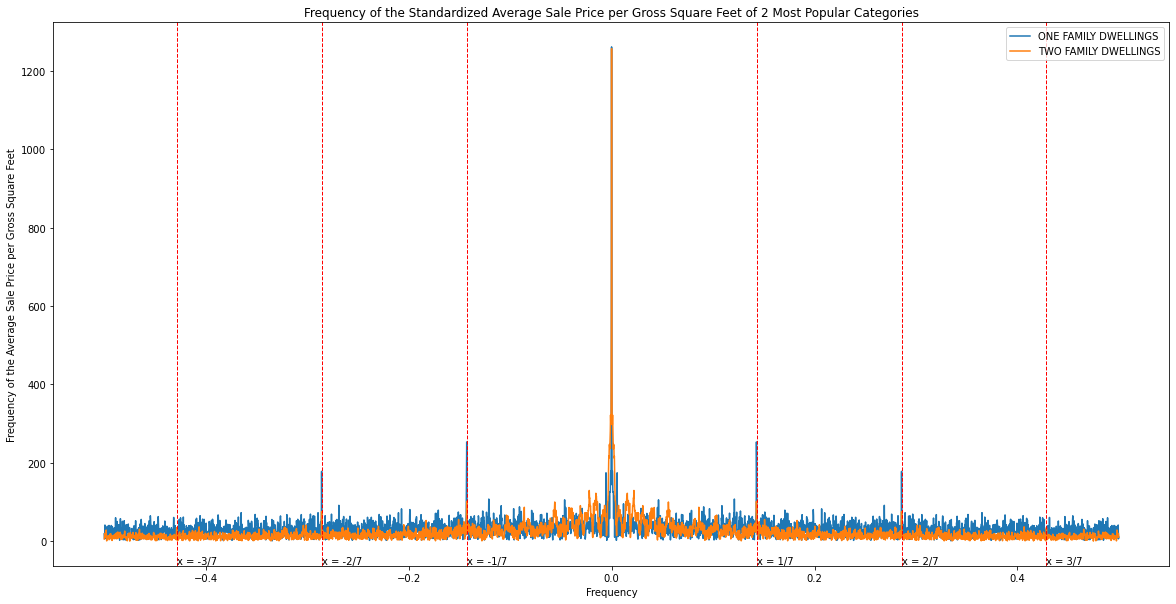

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    scaler = StandardScaler()
    price = scaler.fit_transform(price.values.reshape(-1, 1))
    price = price.flatten()
    price = price[1000:5000]
    vector_size = len(price)
    fft_result = swap_halves(np.fft.fft(price))
    fft_freq = swap_halves(np.fft.fftfreq(vector_size,1))
    plt.plot(fft_freq, np.abs(fft_result), label=category)
vertical_line_positions = [(-1/7, "-1/7"), (1/7, "1/7"),(-2/7, "-2/7"), (2/7, "2/7"),(-3/7, "-3/7"), (3/7, "3/7")]  # Adjust the positions as needed

for position, text in vertical_line_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1)
    plt.text(position, plt.ylim()[0], f'x = {text}', rotation=0, verticalalignment='bottom')

plt.xlabel('Frequency')
plt.ylabel('Frequency of the Average Sale Price per Gross Square Feet')
plt.title(title := f'Frequency of the Standardized Average Sale Price per Gross Square Feet of 2 Most Popular Categories'.replace("."," "))
# plt.ylim([0,2000])
plt.legend()
plt.savefig(title)
plt.show()

In [101]:
def moving_average(data, window_size):
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')

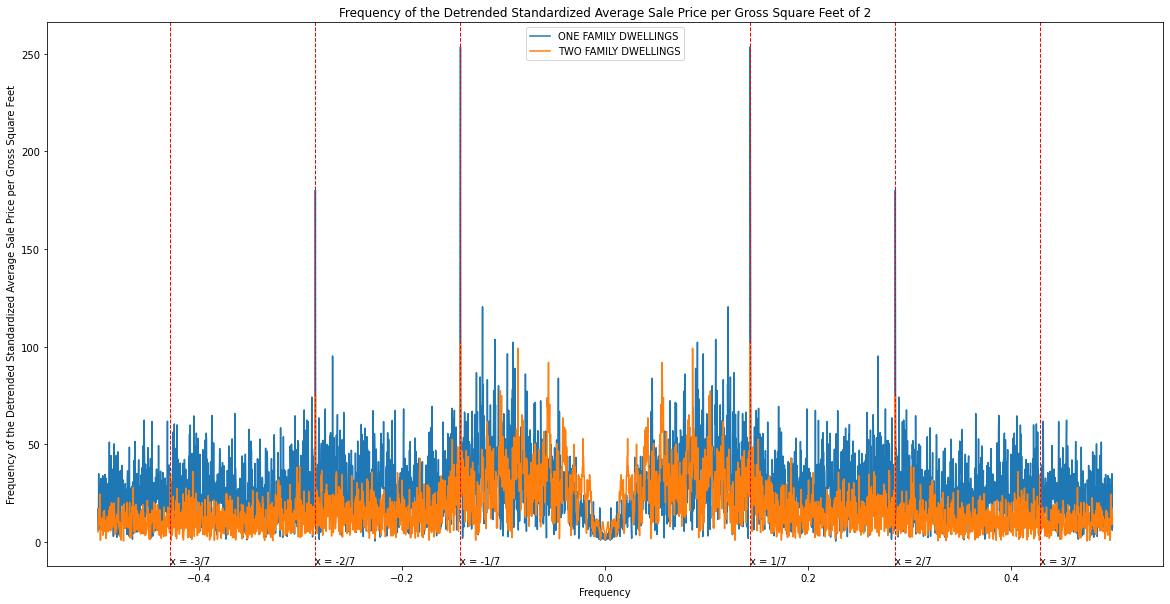

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    scaler = StandardScaler()
    price = scaler.fit_transform(price.values.reshape(-1, 1))
    price = price.flatten()
    window_size = 7
    price = price[window_size-1:] - moving_average(price, window_size)
    price = price[1000:5000]
    vector_size = len(price)
    fft_result = swap_halves(np.fft.fft(price))
    fft_freq = swap_halves(np.fft.fftfreq(vector_size,1))
    plt.plot(fft_freq, np.abs(fft_result), label=category)
vertical_line_positions = [(-1/7, "-1/7"), (1/7, "1/7"),(-2/7, "-2/7"), (2/7, "2/7"),(-3/7, "-3/7"), (3/7, "3/7")]  # Adjust the positions as needed

for position, text in vertical_line_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1)
    plt.text(position, plt.ylim()[0], f'x = {text}', rotation=0, verticalalignment='bottom')

plt.xlabel('Frequency')
plt.ylabel('Frequency of the Detrended Standardized Average Sale Price per Gross Square Feet')
plt.title(title := f'Frequency of the Detrended Standardized Average Sale Price per Gross Square Feet of 2'.replace("."," "))
# plt.ylim([0,2000])
plt.legend()
plt.savefig(title)
plt.show()

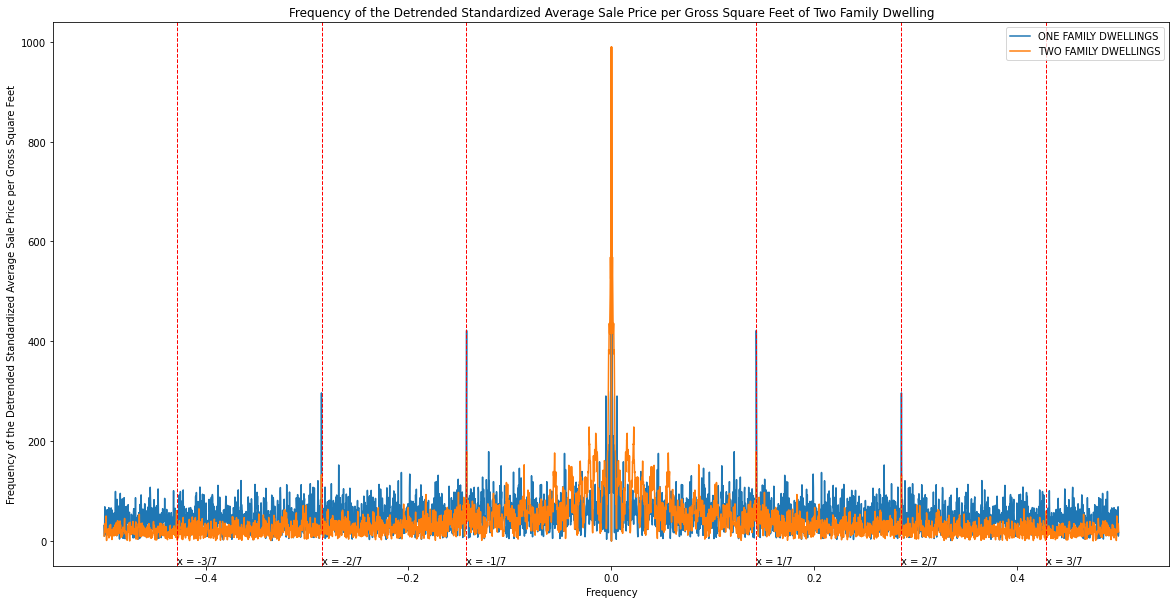

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(20, 10))
for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:2]:
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    window_size = 7
    price = price[1000:5000]
    scaler = StandardScaler()
    price = scaler.fit_transform(price.values.reshape(-1, 1))
    price = price.flatten()
    vector_size = len(price)
    fft_result = swap_halves(np.fft.fft(price))
    fft_freq = swap_halves(np.fft.fftfreq(vector_size,1))
    plt.plot(fft_freq, np.abs(fft_result), label=category)
vertical_line_positions = [(-1/7, "-1/7"), (1/7, "1/7"),(-2/7, "-2/7"), (2/7, "2/7"),(-3/7, "-3/7"), (3/7, "3/7")]  # Adjust the positions as needed

for position, text in vertical_line_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1)
    plt.text(position, plt.ylim()[0], f'x = {text}', rotation=0, verticalalignment='bottom')

plt.xlabel('Frequency')
plt.ylabel('Frequency of the Detrended Standardized Average Sale Price per Gross Square Feet')
plt.title(title := f'Frequency of the Detrended Standardized Average Sale Price per Gross Square Feet of Two Family Dwelling'.replace("."," "))
# plt.ylim([0,2000])
plt.legend()
plt.savefig(title)
plt.show()

In [86]:
np.fft.fft(price)

array([nan +0.j, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
       nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+n

In [87]:
price

DATE
2005-10-29     82.644628
2005-10-30    114.444444
2005-10-31    273.432449
2005-11-01    287.066707
2005-11-02    273.008190
                 ...    
2006-09-07    185.309646
2006-09-08    269.452274
2006-09-09    182.010582
2006-09-11    304.051682
2006-09-12    286.681580
Name: TWO FAMILY DWELLINGS, Length: 300, dtype: float64

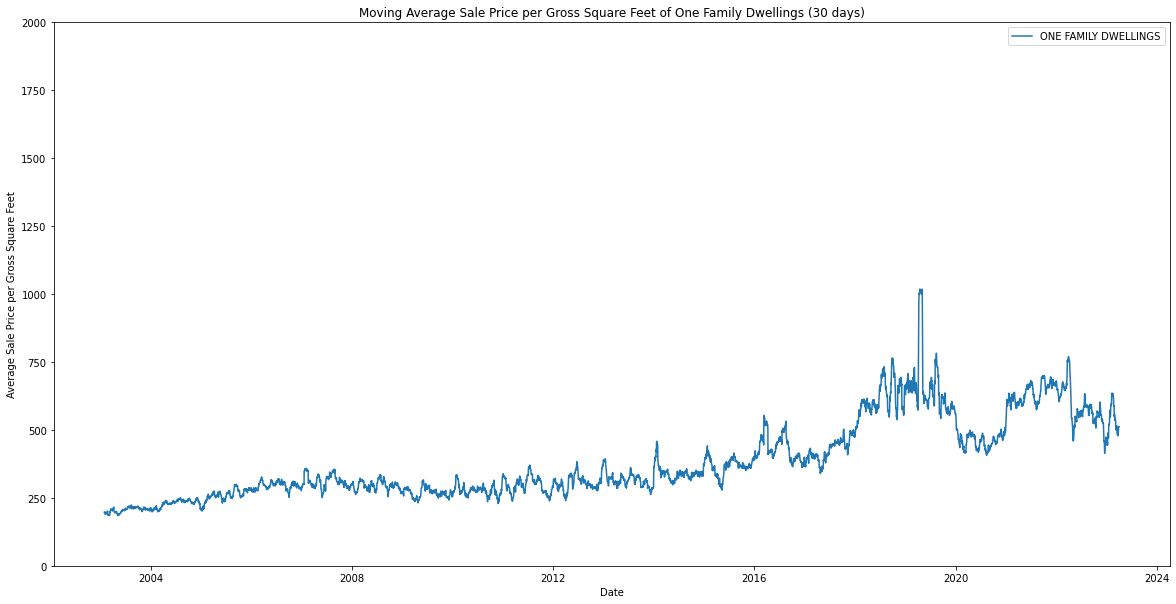

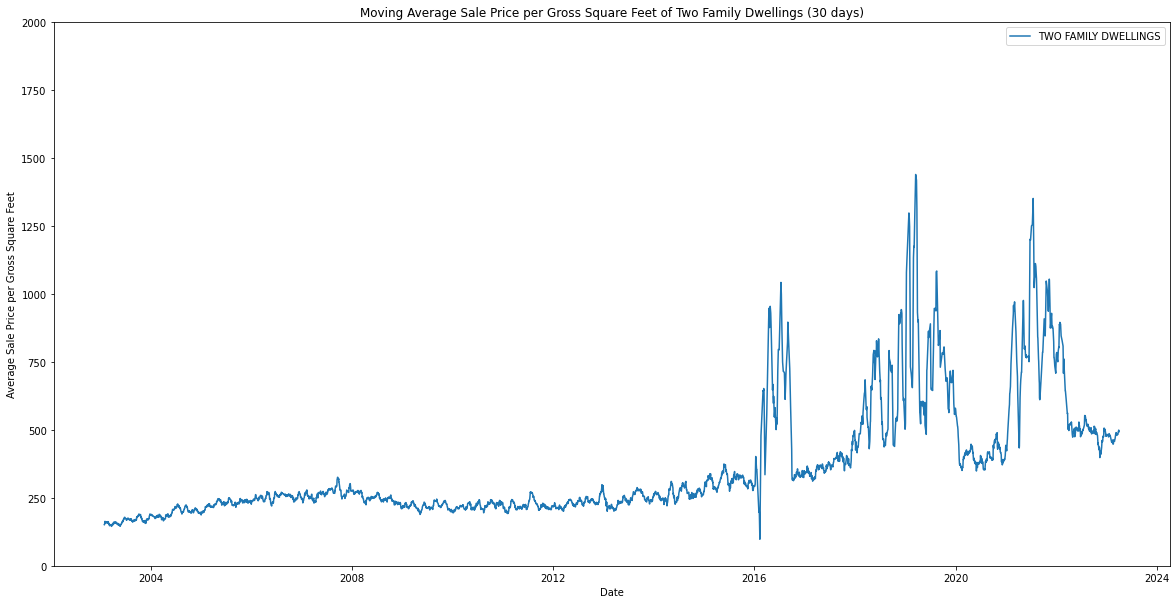

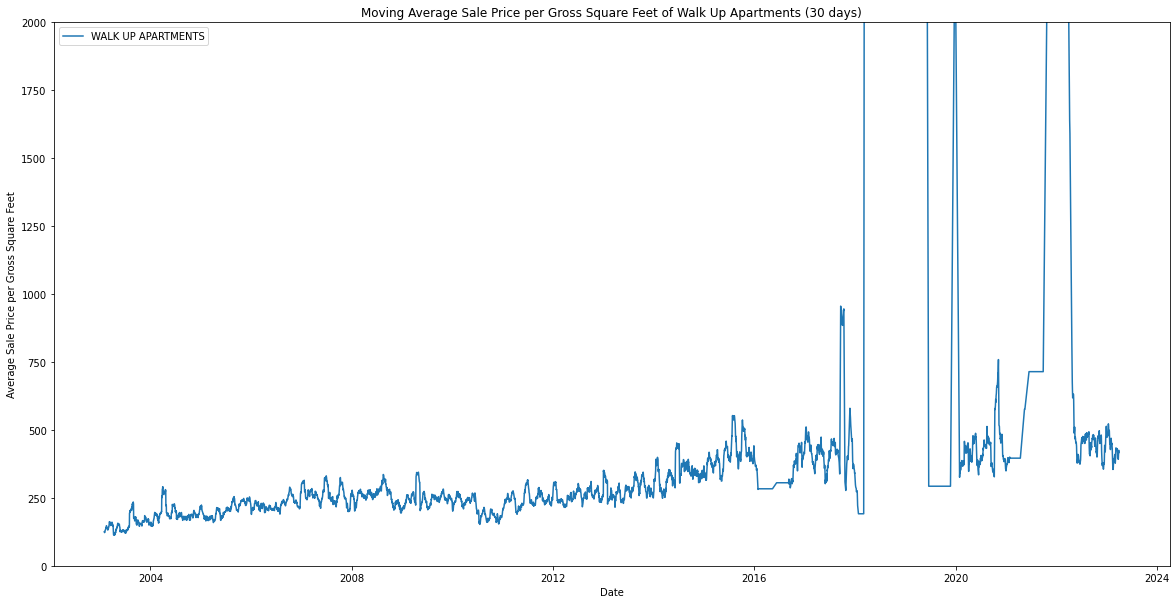

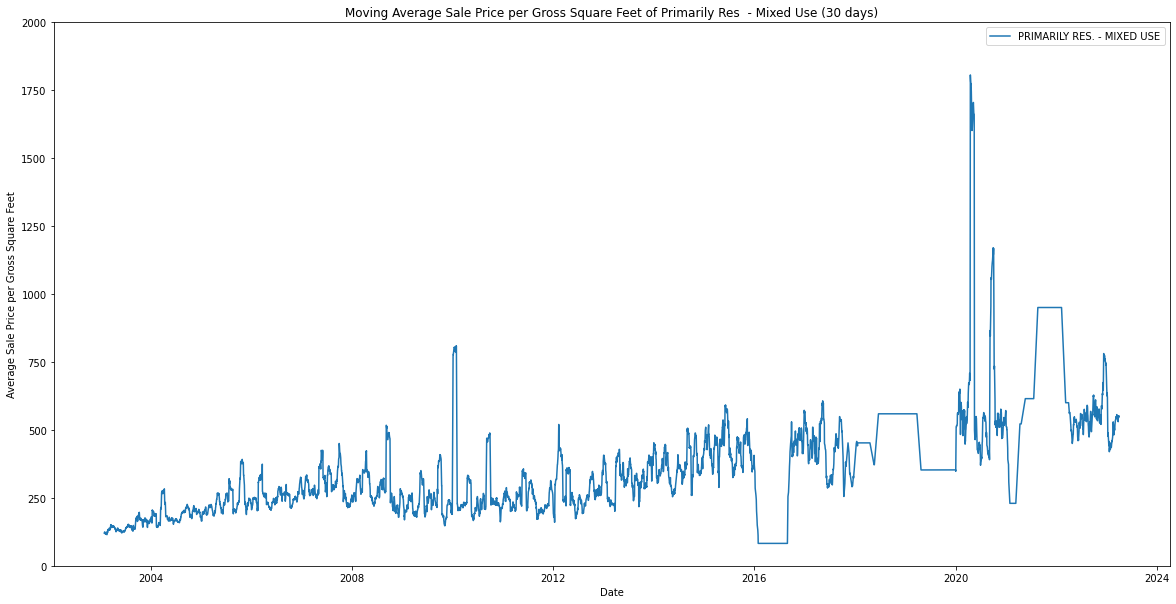

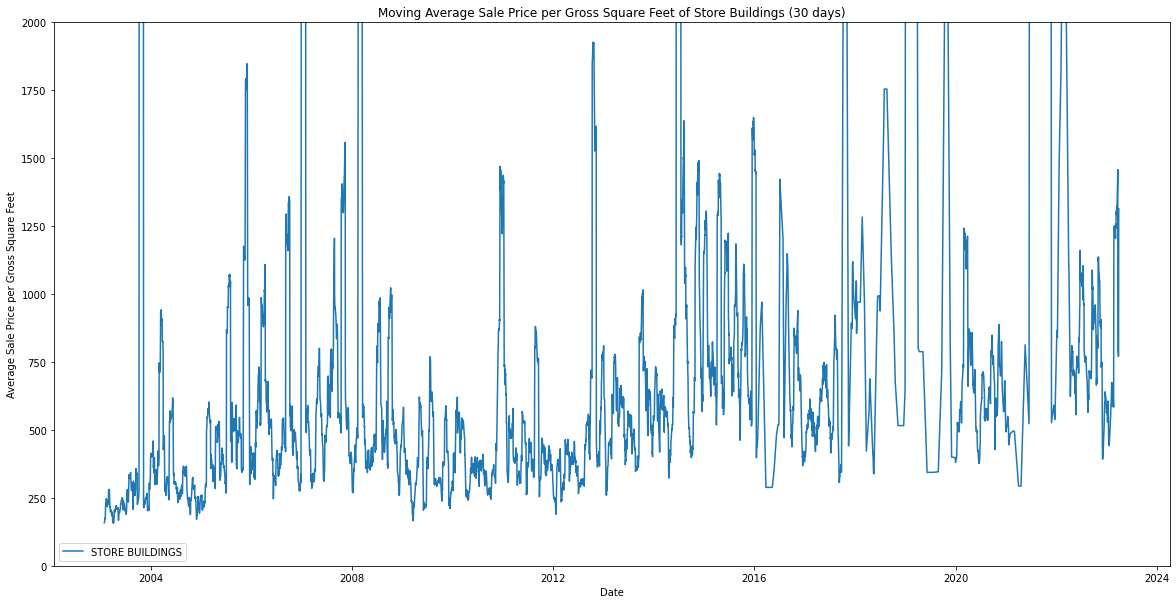

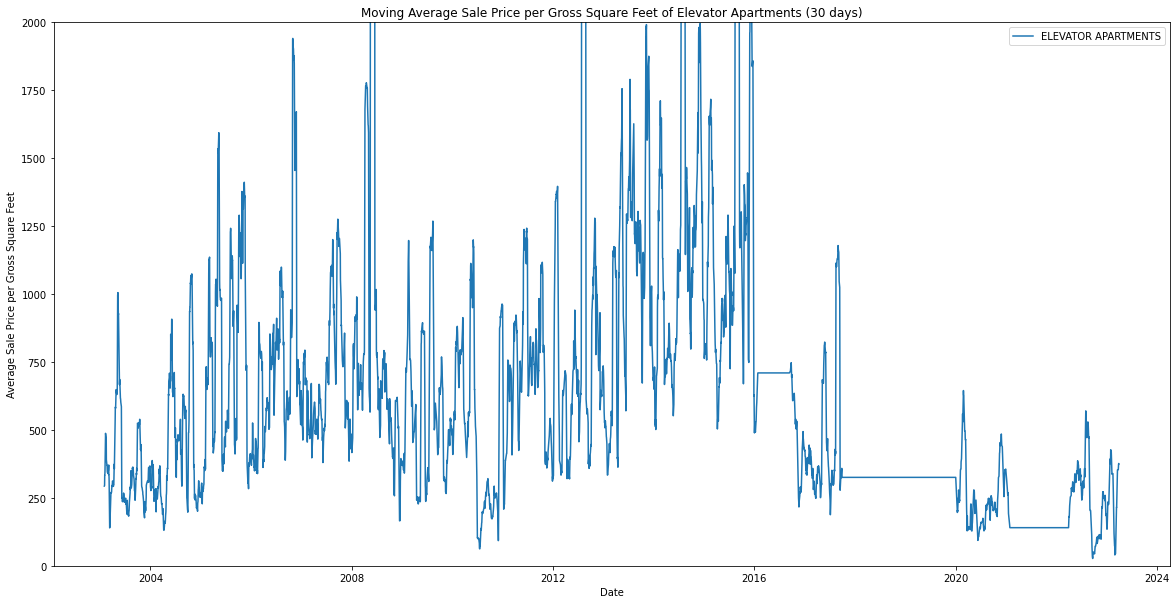

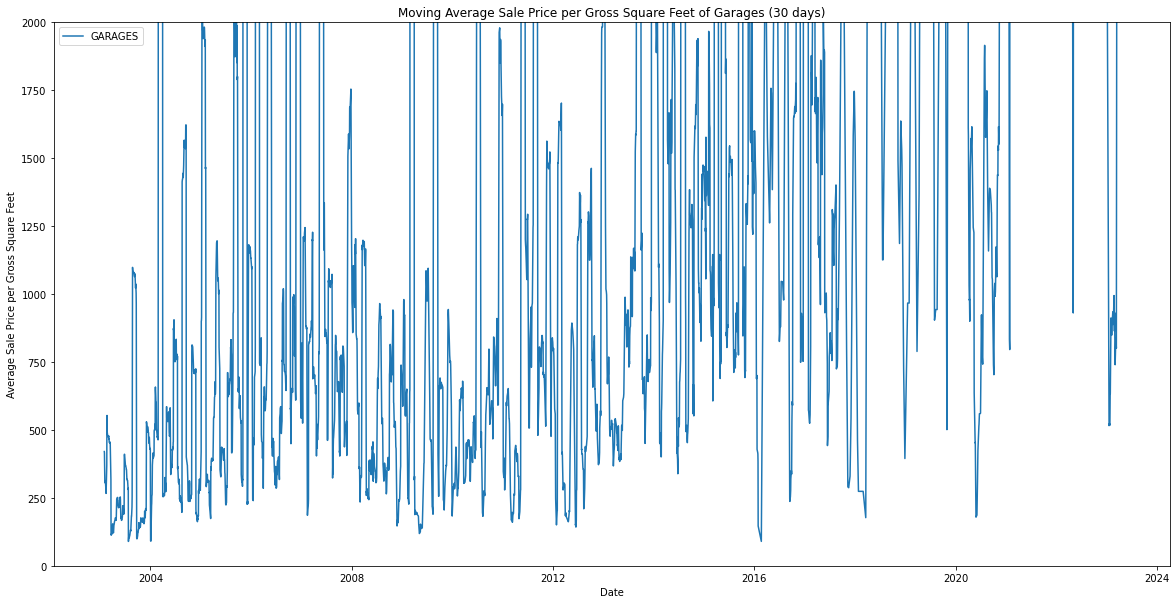

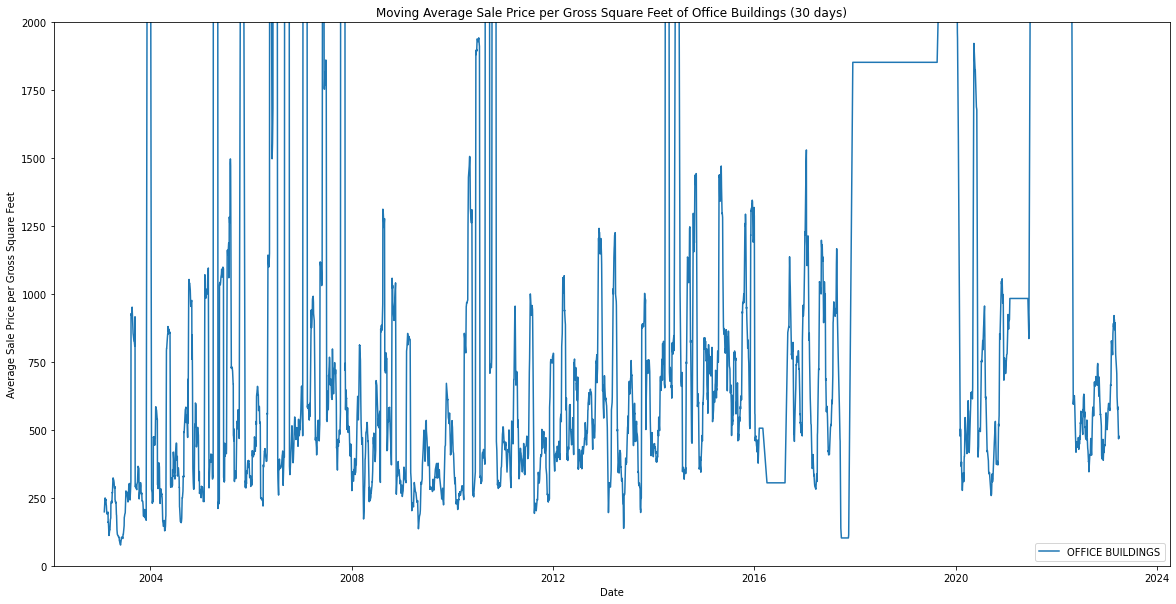

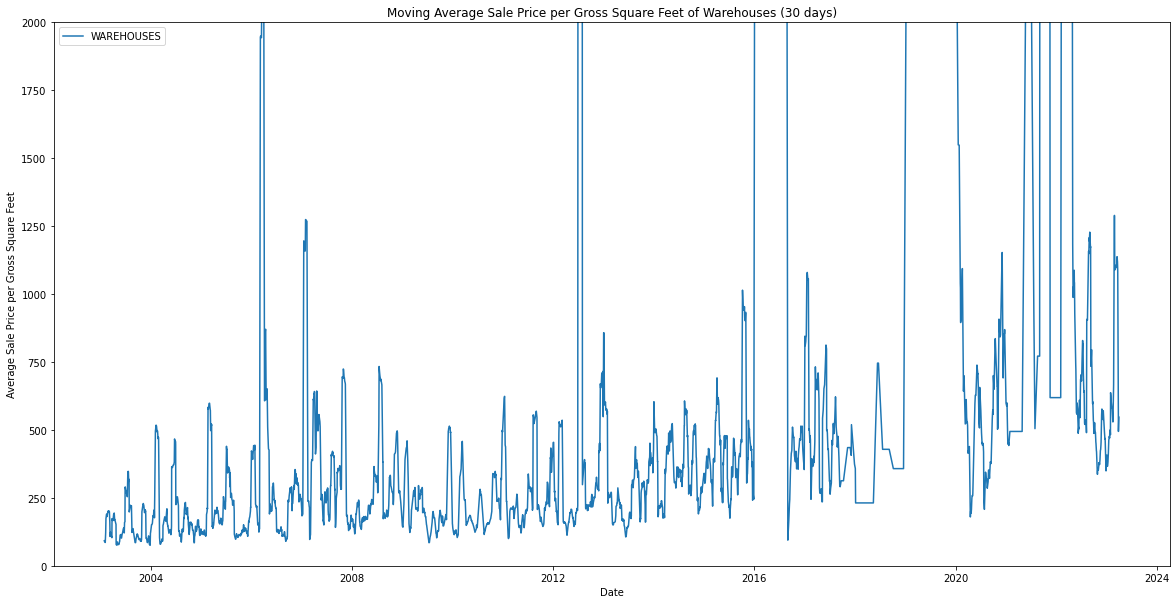

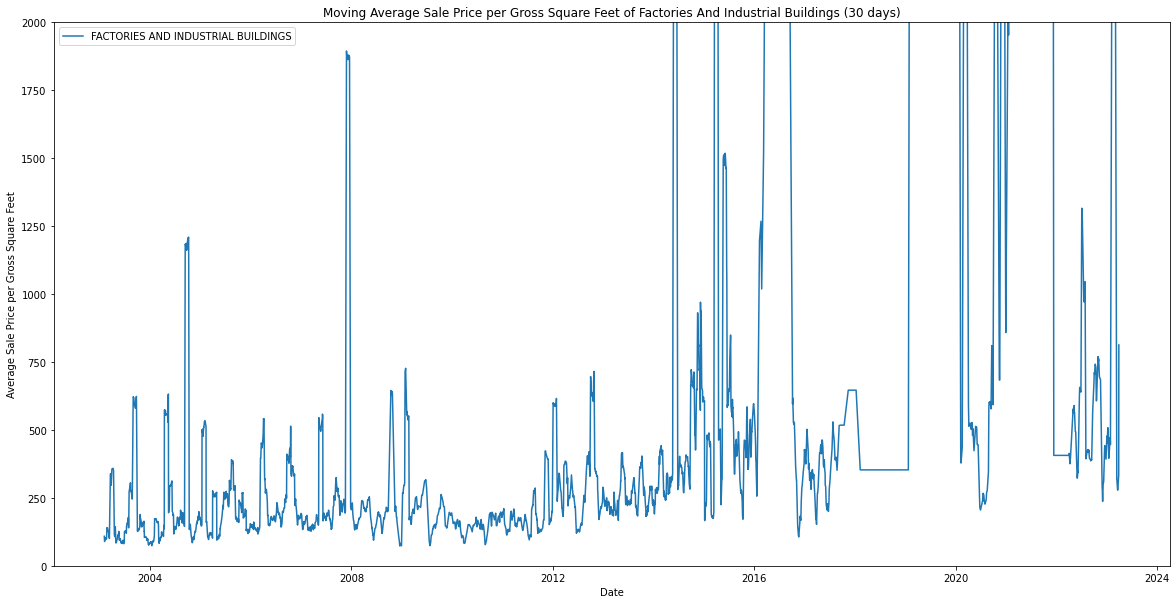

In [73]:
import matplotlib.pyplot as plt

for category in ((df_pivot.isna().sum()/len(df_pivot)).sort_values()).index[:10]:
    plt.figure(figsize=(20, 10))
    price = df_pivot[category]
    date_range = pd.date_range(start=min(price.index), end=max(price.index), freq='D')
    price = price.reindex(date_range)
    price = price.ffill()
    window_size = 30
    plt.plot(price.index, price.rolling(window=window_size).mean(), label=category)
    plt.xlabel('Date')
    plt.ylabel('Average Sale Price per Gross Square Feet')
    plt.title(title := f'Moving Average Sale Price per Gross Square Feet of {category.title()} ({str(window_size)} days)'.replace("."," ").replace("/"," "))
    plt.ylim([0,2000])
    plt.legend()
    plt.savefig(title)
    plt.show()

In [54]:
(df_pivot.isna().sum()/len(df_pivot)).sort_values()

UPPER BUILDING CLASS NAME
ONE FAMILY DWELLINGS                         0.099034
TWO FAMILY DWELLINGS                         0.223977
WALK UP APARTMENTS                           0.312586
PRIMARILY RES. - MIXED USE                   0.388012
STORE BUILDINGS                              0.472942
ELEVATOR APARTMENTS                          0.634064
GARAGES                                      0.637590
OFFICE BUILDINGS                             0.664572
WAREHOUSES                                   0.714089
FACTORIES AND INDUSTRIAL BUILDINGS           0.727733
VACANT LAND                                  0.728346
HOTELS                                       0.729726
RELIGIOUS FACILITIES                         0.887322
CONDOMINIUMS                                 0.900813
MISC. BUILDING CLASSIFICATIONS               0.913077
LOFTS                                        0.916909
HOSPITALS AND HEALTH FACILITIES              0.944504
EDUCATIONAL FACILITIES                       0.950790
IN

In [26]:
df_3 = result_df.groupby(["UPPER BUILDING CLASS AT TIME OF SALE"]).sum()["GROSS SQUARE FEET"].reset_index(level=["UPPER BUILDING CLASS AT TIME OF SALE"])
df_3["UPPER BUILDING CLASS AT TIME OF SALE"] = df_3["UPPER BUILDING CLASS AT TIME OF SALE"].map(building_class_dict_2)
df_3 = df_3.sort_values("GROSS SQUARE FEET", ascending=False)[:10]
df_3.index = list(range(len(df_3)))
df_3["UPPER BUILDING CLASS AT TIME OF SALE"]

UPPER BUILDING CLASS AT TIME OF SALE  GROSS SQUARE FEET
0                               HOTELS       1.256736e+09
1                  ELEVATOR APARTMENTS       6.559729e+08
2                   WALK UP APARTMENTS       4.729816e+08
3                 TWO FAMILY DWELLINGS       3.817349e+08
4                 ONE FAMILY DWELLINGS       3.556858e+08
5                     OFFICE BUILDINGS       3.115219e+08
6                         CONDOMINIUMS       1.352945e+08
7                           WAREHOUSES       9.468780e+07
8                      STORE BUILDINGS       9.052646e+07
9           PRIMARILY RES. - MIXED USE       7.230480e+07

In [13]:
result_df.to_csv("data_lat_lng_390660.csv")

In [6]:
import numpy as np

for column in result_df.columns:
    print(column,"    ",1-np.sum(result_df[column].isna())/len(result_df)," of the data is present")

BOROUGH      1.0  of the data is present
NEIGHBORHOOD      1.0  of the data is present
BUILDING CLASS CATEGORY      1.0  of the data is present
TAX CLASS AT PRESENT      0.7115394585698691  of the data is present
BLOCK      1.0  of the data is present
LOT      1.0  of the data is present
EASE-MENT      0.6366938658054266  of the data is present
BUILDING CLASS AT PRESENT      0.7115394585698691  of the data is present
ADDRESS      1.0  of the data is present
APARTMENT NUMBER      0.7272463071877548  of the data is present
ZIP CODE      0.9999776445434849  of the data is present
RESIDENTIAL UNITS      0.9455168985847093  of the data is present
COMMERCIAL UNITS      0.9140779920043569  of the data is present
TOTAL UNITS      0.9507813707700028  of the data is present
LAND SQUARE FEET      0.9088125685230416  of the data is present
GROSS SQUARE FEET      0.9088139954670744  of the data is present
YEAR BUILT      0.9838774350205362  of the data is present
TAX CLASS AT TIME OF SALE      1.0 

In [65]:
np.sum(result_df["SALE PRICE"]<10)/len(result_df)

0.297201765583966

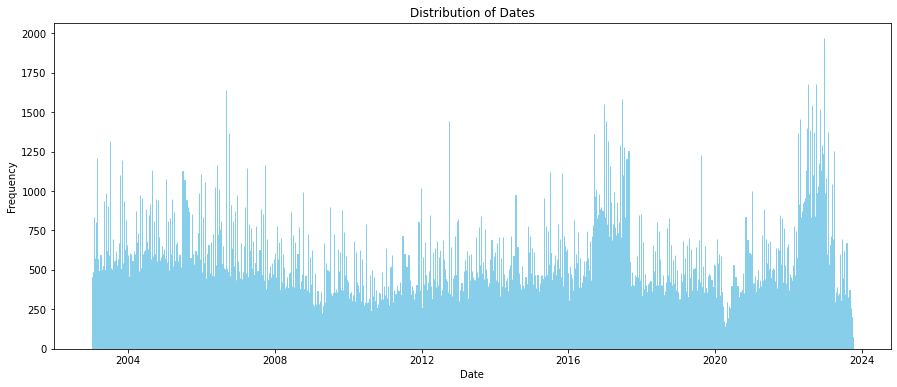

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram of the date distribution
plt.figure(figsize=(15, 6))
plt.hist(result_df["SALE DATE"].dropna(), bins=7200, color='skyblue', edgecolor='skyblue')
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

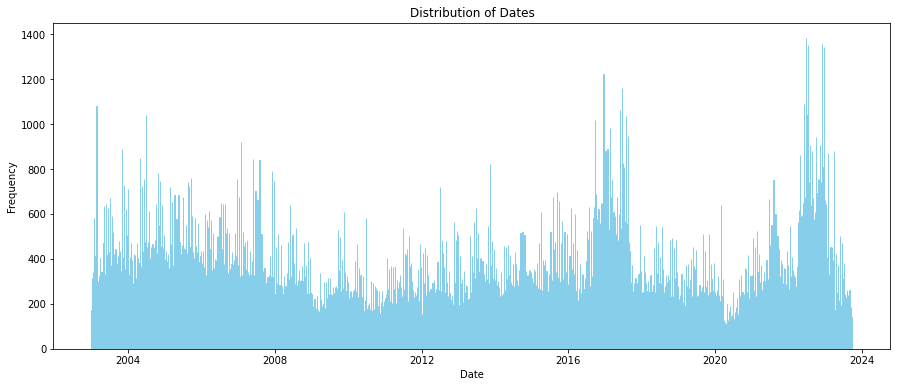

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram of the date distribution
plt.figure(figsize=(15, 6))
plt.hist(result_df["SALE DATE"].dropna(), bins=7200, color='skyblue', edgecolor='skyblue')
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

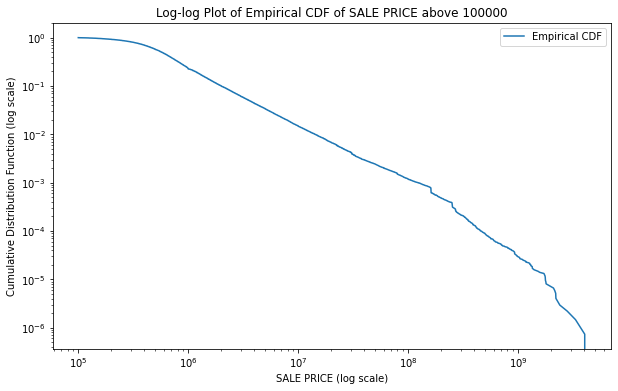

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

min_price_threshold = 100000

# Filter the DataFrame based on the threshold
filtered_df = result_df[result_df["SALE PRICE"] >= min_price_threshold]

sorted_prices = filtered_df["SALE PRICE"].sort_values()
cumulative_distribution = 1-sorted_prices.rank() / len(sorted_prices)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_prices, cumulative_distribution, label='Empirical CDF')
plt.xscale('log')
plt.yscale('log')
plt.title('Log-log Plot of Empirical CDF of SALE PRICE above 100000')
plt.xlabel('SALE PRICE (log scale)')
plt.ylabel('Cumulative Distribution Function (log scale)')
plt.legend()
plt.show()

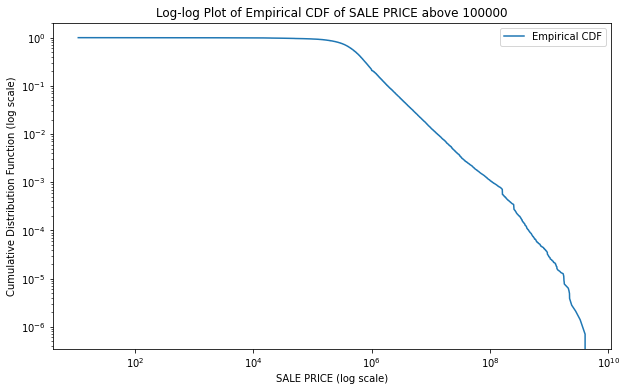

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

sorted_prices = result_df["SALE PRICE"].sort_values()
cumulative_distribution = 1-sorted_prices.rank() / len(sorted_prices)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_prices, cumulative_distribution, label='Empirical CDF')
plt.xscale('log')
plt.yscale('log')
plt.title('Log-log Plot of Empirical CDF of SALE PRICE above 100000')
plt.xlabel('SALE PRICE (log scale)')
plt.ylabel('Cumulative Distribution Function (log scale)')
plt.legend()
plt.show()

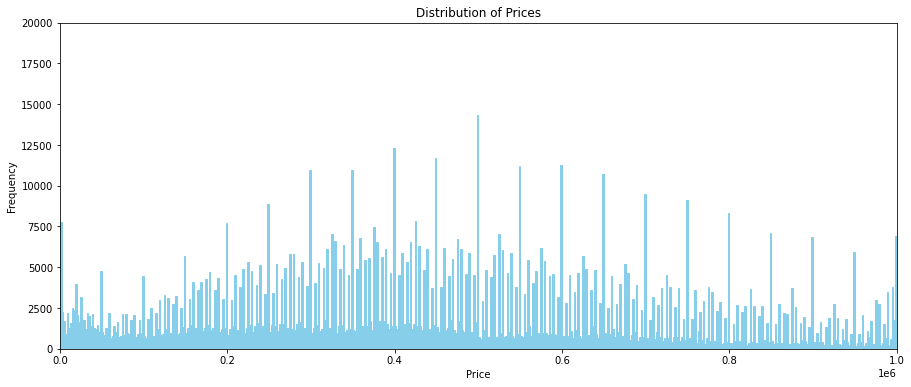

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram of the date distribution
filtered_df = result_df[result_df["SALE PRICE"] <= 1000000]
plt.figure(figsize=(15, 6))
plt.hist(filtered_df["SALE PRICE"].dropna(), bins=500, color='skyblue', edgecolor='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim([0,1000000])
plt.ylim([0,2e4])
plt.show()

In [19]:
manhattan_df = pd.read_csv("manhattan housing price.csv", index_col=0)
manhattan_df.index = list(range(len(manhattan_df)))
manhattan_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_20452\1031815630.py:1: DtypeWarning: Columns (4,7,8,15,16,20,22,23,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  manhattan_df = pd.read_csv("manhattan housing price.csv", index_col=0)


BOROUGH               NEIGHBORHOOD  \
0             1  ALPHABET CITY               
1             1  ALPHABET CITY               
2             1  ALPHABET CITY               
3             1  ALPHABET CITY               
4             1  ALPHABET CITY               
...         ...                        ...   
446403        1   WASHINGTON HEIGHTS UPPER   
446404        1   WASHINGTON HEIGHTS UPPER   
446405        1   WASHINGTON HEIGHTS UPPER   
446406        1   WASHINGTON HEIGHTS UPPER   
446407        1   WASHINGTON HEIGHTS UPPER   

                             BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0       07  RENTALS - WALKUP APARTMENTS                                2B   
1       07  RENTALS - WALKUP APARTMENTS                                2A   
2       07  RENTALS - WALKUP APARTMENTS                                 2   
3       07  RENTALS - WALKUP APARTMENTS                                2B   
4       07  RENTALS - WALKUP APARTMENTS                                 2   
...                                              ...                  ...   
446403                            22 STORE BUILDINGS                    4   
446404                            22 STORE BUILDINGS                    4   
446405                         29 COMMERCIAL GARAGES                    4   
446406                         29 COMMERCIAL GARAGES                    4   
446407                              44 CONDO PARKING                    4   

        BLOCK   LOT EASEMENT BUILDING CLASS AT PRESENT  \
0         372    19                                 C7   
1         377    53                                 C2   
2         385    53                                 C4   
3         386    63                                 D7   
4         400    53                                 C1   
...       ...   ...      ...                       ...   
446403   2174    65      NaN                        K2   
446404   2175    66      NaN                        K1   
446405   2172     1      NaN                        G6   
446406   2180    95      NaN                        G4   
446407   2180  1221      NaN                        RG   

                                          ADDRESS APARTMENT NUMBER  ...  \
0       292 EAST THIRD STREET                                       ...   
1       269 EAST 7TH   STREET                                       ...   
2       234 EAST 2ND   STREET                                       ...   
3       215 EAST 3RD   STREET                                       ...   
4       209 EAST 4 STREET                                           ...   
...                                           ...              ...  ...   
446403                         110 DYCKMAN STREET              NaN  ...   
446404                         172 DYCKMAN STREET              NaN  ...   
446405                              4560 BROADWAY              NaN  ...   
446406                              4275 BROADWAY              NaN  ...   
446407                 736 WEST 187 STREET, PRK21            PRK21  ...   

        Latitude  Longitude  Community Board  Council District Census Tract  \
0            NaN        NaN              NaN               NaN          NaN   
1            NaN        NaN              NaN               NaN          NaN   
2            NaN        NaN              NaN               NaN          NaN   
3            NaN        NaN              NaN               NaN          NaN   
4            NaN        NaN              NaN               NaN          NaN   
...          ...        ...              ...               ...          ...   
446403       NaN        NaN              NaN               NaN          NaN   
446404       NaN        NaN              NaN               NaN          NaN   
446405       NaN        NaN              NaN               NaN          NaN   
446406       NaN        NaN              NaN               NaN          NaN   
446407       NaN        NaN              NaN               NaN 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram of the date distribution
plt.figure(figsize=(15, 6))
plt.hist(result_df["SALE DATE"].dropna(), bins=1000, color='skyblue', edgecolor='skyblue')
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [21]:
bronx_df = pd.read_csv("bronx housing price.csv", index_col=0)
bronx_df.index = list(range(len(bronx_df)))
bronx_df.to_csv("bronx housing price.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_20452\2811562204.py:1: DtypeWarning: Columns (4,7,8,15,16,22,23,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  bronx_df = pd.read_csv("bronx housing price.csv", index_col=0)


In [22]:
brooklyn_df = pd.read_csv("brooklyn housing price.csv", index_col=0)
brooklyn_df.index = list(range(len(brooklyn_df)))
brooklyn_df.to_csv("brooklyn housing price.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_20452\3122588373.py:1: DtypeWarning: Columns (4,7,8,15,16,22,23,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  brooklyn_df = pd.read_csv("brooklyn housing price.csv", index_col=0)


In [23]:
queens_df = pd.read_csv("queens housing price.csv", index_col=0)
queens_df.index = list(range(len(queens_df)))
queens_df.to_csv("queens housing price.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_20452\2775097551.py:1: DtypeWarning: Columns (4,7,8,15,16,20,22,23,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  queens_df = pd.read_csv("queens housing price.csv", index_col=0)


In [24]:
statenisland_df = pd.read_csv("statenisland housing price.csv", index_col=0)
statenisland_df.index = list(range(len(statenisland_df)))
statenisland_df.to_csv("statenisland housing price.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_20452\3463693623.py:1: DtypeWarning: Columns (4,7,8,15,16,20,22,23,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  statenisland_df = pd.read_csv("statenisland housing price.csv", index_col=0)


In [21]:
import numpy as np

def get_statistics(df):

    numeric_stats = df.describe()

    # Additional custom statistics
    custom_stats = pd.DataFrame(index=df.columns)

    # Count of NaN values
    custom_stats['NaN_count'] = df.isna().sum()

    # Count of zeros
    custom_stats['Zero_count'] = (df == 0).sum()

    # Count of ones
    custom_stats['One_count'] = (df == 1).sum()

    # Mean for numeric columns
    custom_stats['Mean'] = df.mean()

    # Variance for numeric columns
    custom_stats['Variance'] = df.var()

    # Number of unique values for categorical columns
    custom_stats['Unique_values'] = df.apply(lambda x: len(x.unique()) if pd.api.types.is_categorical_dtype(x) else np.nan)

    # Display the combined statistics
    combined_stats = pd.concat([numeric_stats, custom_stats], axis=1)
    return combined_stats


In [98]:
import pandas as pd
manhattan_df = pd.read_csv("manhattan housing price.csv", index_col=0)
manhattan_df = manhattan_df.sample(n=200000, random_state=42)
manhattan_df.to_csv("manhattan housing price sampled.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_20452\3744195198.py:2: DtypeWarning: Columns (4,7,8,15,16,20,22,23,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  manhattan_df = pd.read_csv("manhattan housing price.csv", index_col=0)


In [96]:
manhattan_df_sampled = pd.read_csv("manhattan housing price sampled.csv", index_col=0)

In [81]:
from geopy.geocoders import Nominatim
import time
import re

loc = Nominatim(user_agent="Geopy Library")
address_dict = dict()
no_result_set = set()
# for i in range(len(manhattan_df)):
for i in range(10):
    address = " ".join(re.split(r"( )+", manhattan_df.loc[i,"ADDRESS"].strip().split(", ")[0]))
    if address not in address_dict and address not in no_result_set:
        getLoc = loc.geocode(address+", Manhattan, NYC")
        print(getLoc)
        try:
            manhattan_df.loc[i,"ZIPCODE"] = getLoc.raw.get("address", {})
            manhattan_df.loc[i,"Latitude"] = getLoc.latitude
            manhattan_df.loc[i,"Longitude"] = getLoc.longitude
            # print((lat,lng,zipcode))
            address_dict[address] = (lat,lng,zipcode)
        except:
            no_result_set.add(address)
    elif manhattan_df.loc[i,"ADDRESS"] in no_result_set:
        pass
    elif manhattan_df.loc[i,"ADDRESS"] in address_dict:
        (lat,lng,zipcode) = address_dict[address]
        address_dict[address] = (lat,lng,zipcode)
    time.sleep(0.5)

None
269, East 7th Street, Alphabet City, Manhattan Community Board 3, Manhattan, New York County, City of New York, New York, 10009, United States
234, East 2nd Street, Alphabet City, East Village, Manhattan, New York County, City of New York, New York, 10009, United States
215, East 3rd Street, Alphabet City, East Village, Manhattan, New York County, City of New York, New York, 10009, United States
Link NYC, East 4th Street, Manhattan Community Board 3, Manhattan, New York County, City of New York, New York, 10009, United States
168-170, East 7th Street, Alphabet City, Manhattan Community Board 3, Manhattan, New York County, City of New York, New York, 10009, United States
182, Avenue A, Alphabet City, Manhattan Community Board 3, Manhattan, New York County, City of New York, New York, 10009, United States
506, East 13th Street, Alphabet City, Manhattan Community Board 3, Manhattan, New York County, City of New York, New York, 10009, United States
543, East 12th Street, Alphabet City

KeyboardInterrupt: 

In [84]:
lng

NameError: name 'lng' is not defined

In [83]:
address_dict

{}

In [50]:
loc.geocode(manhattan_df.loc[i,"ADDRESS"].strip()+", Manhattan, NYC")

In [49]:
manhattan_df.loc[i,"ADDRESS"].strip()+", Manhattan, NYC"

'610 EAST 5TH STREET, 9, Manhattan, NYC'

In [78]:
address

'415 WEST 21ST   STREET'

In [97]:
loc.geocode("415 WEST 21ST   STREET, Manhattan, NYC")

Location(415, West 21st Street, Manhattan Community Board 4, Manhattan, New York County, City of New York, New York, 10011, United States, (40.745706999999996, -74.00296275000001, 0.0))

In [45]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

result_df = pd.read_csv("filtered_data_1411949.csv", index_col=0)
result_df = result_df[result_df["SALE PRICE"]>10000]
result_df = result_df[~result_df["Latitude"].isna()]
result_df["SALE DATE"] = pd.to_datetime(result_df["SALE DATE"], errors='coerce')
result_df["YEAR BUILT"] = result_df["YEAR BUILT"].astype(str).str[-4:].astype(int).replace(0, np.nan)
result_df["SALE PRICE"] = pd.to_numeric(result_df["SALE PRICE"], errors='coerce')
result_df = result_df.dropna(subset=['SALE PRICE','YEAR BUILT',"SALE DATE"])
result_df = result_df[result_df["YEAR BUILT"]>1800]
df_else = result_df["YEAR BUILT"]
result_df['AGE'] = result_df["SALE DATE"].dt.year.astype(int) - result_df['YEAR BUILT']
# result_df["BOROUGH"] = result_df["BOROUGH"].apply(assign_borough)
result_df['TAX CLASS AT TIME OF SALE'] = result_df['TAX CLASS AT TIME OF SALE'].astype('category')
result_df['BUILDING CLASS AT TIME OF SALE'] = result_df['BUILDING CLASS AT TIME OF SALE'].astype('category')
columns_to_convert = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for col in columns_to_convert:
    try:
        result_df[col] = result_df[col].replace(',|-| ', '', regex=True).astype(float)
    except ValueError:
        # If the conversion fails, remove the entire row
        result_df = result_df[~result_df[col].replace(',|-| ', '', regex=True).astype(float).isna()]
result_df['LAND SQUARE FEET'] = result_df['LAND SQUARE FEET'].replace(0, np.nan)
result_df['GROSS SQUARE FEET'] = result_df['GROSS SQUARE FEET'].replace(0, np.nan)
result_df = result_df[['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT', 'ADDRESS',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'AGE',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Latitude', 'Longitude',
       'Community Board', 'Council District']]

# # Assuming your DataFrame is named df and specified columns are in 'columns_to_impute'
# columns_to_impute = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
#        'LAND SQUARE FEET', 'GROSS SQUARE FEET']

# subset_df = result_df[columns_to_impute]

# # Initialize the IterativeImputer with RandomForestRegressor as the estimator
# imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# # Fit and transform the imputation on the subset of data
# imputed_data = imputer.fit_transform(subset_df)

# # Post-process the imputed values for specific columns
# for i, col in enumerate(columns_to_impute):
#     # Check if the column has natural number values only
#     if np.all(imputed_data[:, i] == np.round(imputed_data[:, i])):
#         imputed_data[:, i] = np.round(imputed_data[:, i]).astype(int)
#     else:
#         # Adjust the precision or type for columns with a broader range
#         imputed_data[:, i] = imputed_data[:, i].astype(int)  # Change to int or adjust precision as needed

# # Replace the imputed values back to the original DataFrame
# result_df[columns_to_impute] = imputed_data
columns_to_check = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

# Filter the DataFrame to keep rows where all specified columns are present
result_df = result_df.dropna(subset=columns_to_check, how='any')
result_df["PRICE PER LAND SQUARE FEET"] = result_df["SALE PRICE"]/result_df["LAND SQUARE FEET"]
result_df["PRICE PER GROSS SQUARE FEET"] = result_df["SALE PRICE"]/result_df["GROSS SQUARE FEET"]
result_df = result_df[['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT', 'ADDRESS',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', "PRICE PER LAND SQUARE FEET", "PRICE PER GROSS SQUARE FEET", 'AGE',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Latitude', 'Longitude',
       'Community Board', 'Council District']]
result_df['BUILDING CLASS CATEGORY'] = result_df['BUILDING CLASS CATEGORY'].replace('\s+', ' ', regex=True)
result_df['NEIGHBORHOOD'] = result_df['NEIGHBORHOOD'].replace('\s+', ' ', regex=True)
result_df['BUILDING CLASS AT TIME OF SALE'] = result_df['BUILDING CLASS AT TIME OF SALE'].replace('\s+', ' ', regex=True)
result_df['ADDRESS'] = result_df['ADDRESS'].replace('\s+', ' ', regex=True)
result_df = result_df.sort_values(by='SALE DATE')
for column in result_df.columns:
    print(column,"    ",1-np.sum(result_df[column].isna())/len(result_df)," of the data is present")
result_df.index = list(range(len(result_df)))
result_df.to_csv("filtered_data_197971.csv")
# result_df


C:\Users\DELL\AppData\Local\Temp\ipykernel_6876\4143501380.py:7: DtypeWarning: Columns (1,4,7,8,15,16,22,23,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  result_df = pd.read_csv("filtered_data_1411949.csv", index_col=0)


NEIGHBORHOOD      1.0  of the data is present
BUILDING CLASS CATEGORY      1.0  of the data is present
BLOCK      1.0  of the data is present
LOT      1.0  of the data is present
ADDRESS      1.0  of the data is present
ZIP CODE      1.0  of the data is present
RESIDENTIAL UNITS      1.0  of the data is present
COMMERCIAL UNITS      1.0  of the data is present
LAND SQUARE FEET      1.0  of the data is present
GROSS SQUARE FEET      1.0  of the data is present
PRICE PER LAND SQUARE FEET      1.0  of the data is present
PRICE PER GROSS SQUARE FEET      1.0  of the data is present
AGE      1.0  of the data is present
TAX CLASS AT TIME OF SALE      1.0  of the data is present
BUILDING CLASS AT TIME OF SALE      1.0  of the data is present
SALE PRICE      1.0  of the data is present
SALE DATE      1.0  of the data is present
Latitude      1.0  of the data is present
Longitude      1.0  of the data is present
Community Board      1.0  of the data is present
Council District      1.0  of the 

In [44]:
sorted(df['BUILDING CLASS CATEGORY'].value_counts().to_dict().items())

[('01 ONE FAMILY DWELLINGS', 86823),
 ('02 TWO FAMILY DWELLINGS', 64239),
 ('03 THREE FAMILY DWELLINGS', 15146),
 ('04 TAX CLASS 1 CONDOS', 722),
 ('05 TAX CLASS 1 VACANT LAND', 24),
 ('06 TAX CLASS 1 - OTHER', 19),
 ('07 RENTALS - WALKUP APARTMENTS', 10949),
 ('08 RENTALS - ELEVATOR APARTMENTS', 1702),
 ('09 COOPS - WALKUP APARTMENTS', 21),
 ('10 COOPS - ELEVATOR APARTMENTS', 69),
 ('11 SPECIAL CONDO BILLING LOTS', 539),
 ('11A CONDO-RENTALS', 5),
 ('12 CONDOS - WALKUP APARTMENTS', 210),
 ('13 CONDOS - ELEVATOR APARTMENTS', 3469),
 ('14 RENTALS - 4-10 UNIT', 2256),
 ('15 CONDOS - 2-10 UNIT RESIDENTIAL', 555),
 ('16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT', 2),
 ('17 CONDO COOPS', 4),
 ('21 OFFICE BUILDINGS', 1546),
 ('22 STORE BUILDINGS', 3647),
 ('23 LOFT BUILDINGS', 71),
 ('25 LUXURY HOTELS', 75),
 ('26 OTHER HOTELS', 746),
 ('27 FACTORIES', 784),
 ('28 COMMERCIAL CONDOS', 4),
 ('29 COMMERCIAL GARAGES', 1058),
 ('30 WAREHOUSES', 1254),
 ('31 COMMERCIAL VACANT LAND', 8),
 ('32 HOSPIT

In [38]:
df = pd.read_csv("filtered_data_197971.csv", index_col=0)
sorted(df['BUILDING CLASS CATEGORY'].value_counts().to_dict().items())

[('01  ONE FAMILY DWELLINGS', 12403),
 ('01 ONE FAMILY DWELLINGS', 74420),
 ('02  TWO FAMILY DWELLINGS', 9809),
 ('02 TWO FAMILY DWELLINGS', 54430),
 ('03  THREE FAMILY DWELLINGS', 2417),
 ('03 THREE FAMILY DWELLINGS', 12729),
 ('04 TAX CLASS 1 CONDOS', 722),
 ('05  TAX CLASS 1 VACANT LAND', 7),
 ('05 TAX CLASS 1 VACANT LAND', 17),
 ('06  TAX CLASS 1 - OTHER', 6),
 ('06 TAX CLASS 1 - OTHER', 13),
 ('07  RENTALS - WALKUP APARTMENTS', 2008),
 ('07 RENTALS - WALKUP APARTMENTS', 8941),
 ('08  RENTALS - ELEVATOR APARTMENTS', 276),
 ('08 RENTALS - ELEVATOR APARTMENTS', 1426),
 ('09  COOPS - WALKUP APARTMENTS', 9),
 ('09 COOPS - WALKUP APARTMENTS', 12),
 ('10  COOPS - ELEVATOR APARTMENTS', 24),
 ('10 COOPS - ELEVATOR APARTMENTS', 45),
 ('11  SPECIAL CONDO BILLING LOTS', 1),
 ('11 SPECIAL CONDO BILLING LOTS', 538),
 ('11A CONDO-RENTALS', 5),
 ('12 CONDOS - WALKUP APARTMENTS', 210),
 ('13 CONDOS - ELEVATOR APARTMENTS', 3469),
 ('14  RENTALS - 4-10 UNIT', 375),
 ('14 RENTALS - 4-10 UNIT', 1881),

In [26]:
dict(df_else.value_counts())

{1920.0: 27770,
 1930.0: 22473,
 1925.0: 19573,
 1950.0: 14862,
 1910.0: 14847,
 1960.0: 12675,
 1940.0: 11217,
 1931.0: 9390,
 1955.0: 9022,
 1901.0: 7608,
 1899.0: 7230,
 1965.0: 7204,
 1935.0: 6915,
 2018.0: 6175,
 1945.0: 5910,
 1900.0: 5894,
 1963.0: 5539,
 2016.0: 5517,
 2017.0: 5501,
 2015.0: 5410,
 1915.0: 5273,
 2007.0: 5160,
 1962.0: 4959,
 2005.0: 4527,
 1970.0: 4390,
 1961.0: 4192,
 1964.0: 4130,
 2006.0: 4053,
 1952.0: 3973,
 1928.0: 3706,
 1951.0: 3505,
 2008.0: 3493,
 2019.0: 3392,
 2014.0: 3380,
 1975.0: 3125,
 1929.0: 3064,
 2004.0: 2994,
 1987.0: 2928,
 1958.0: 2846,
 1926.0: 2749,
 1905.0: 2670,
 1956.0: 2670,
 1957.0: 2570,
 1986.0: 2494,
 1959.0: 2449,
 1985.0: 2364,
 1927.0: 2334,
 1988.0: 2154,
 1949.0: 2078,
 2003.0: 2055,
 1953.0: 2047,
 1989.0: 1964,
 1954.0: 1963,
 2009.0: 1953,
 2013.0: 1936,
 1939.0: 1886,
 1980.0: 1788,
 1924.0: 1676,
 2002.0: 1640,
 1938.0: 1498,
 1941.0: 1493,
 1990.0: 1487,
 1966.0: 1427,
 2001.0: 1370,
 1948.0: 1332,
 2020.0: 1325,
 19

In [28]:
result_df['YEAR BUILT'].dt.year.astype(int)

AttributeError: Can only use .dt accessor with datetimelike values

In [22]:
df.dtypes

NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
BLOCK                                      int64
LOT                                        int64
ADDRESS                                   object
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
LAND SQUARE FEET                          object
GROSS SQUARE FEET                         object
YEAR BUILT                                object
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
Latitude                                 float64
Longitude                                float64
Community Board                          float64
Council District                         float64
dtype: object

In [21]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Assuming your DataFrame is named df and specified columns are in 'columns_to_impute'
columns_to_impute = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET']

subset_df = df[columns_to_impute]

# Initialize the IterativeImputer with RandomForestRegressor as the estimator
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# Fit and transform the imputation on the subset of data
imputed_data = imputer.fit_transform(subset_df)

# Post-process the imputed values for specific columns
for i, col in enumerate(columns_to_impute):
    # Check if the column has natural number values only
    if np.all(imputed_data[:, i] == np.round(imputed_data[:, i])):
        imputed_data[:, i] = np.round(imputed_data[:, i]).astype(int)
    else:
        # Adjust the precision or type for columns with a broader range
        imputed_data[:, i] = imputed_data[:, i].astype(int)  # Change to int or adjust precision as needed

# Replace the imputed values back to the original DataFrame
df[columns_to_impute] = imputed_data

ValueError: could not convert string to float: '7,406'

In [16]:
result_df.columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT', 'ADDRESS',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'TAX CLASS AS OF FINAL ROLL',
       'BUILDING CLASS AS OF FINAL ROLL', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [13]:
import numpy as np

columns_to_keep = []

for column in result_df.columns:
    if 1-np.sum(result_df[column].isna())/len(result_df) > 0.6:
        columns_to_keep .append(column)

result_df = result_df[columns_to_keep]

for column in result_df.columns:
    print(column,"    ",1-np.sum(result_df[column].isna())/len(result_df)," of the data is present")

NEIGHBORHOOD      1.0  of the data is present
BUILDING CLASS CATEGORY      1.0  of the data is present
BLOCK      1.0  of the data is present
LOT      1.0  of the data is present
ADDRESS      1.0  of the data is present
ZIP CODE      1.0  of the data is present
RESIDENTIAL UNITS      0.8399170634311166  of the data is present
COMMERCIAL UNITS      0.7766804894281473  of the data is present
TOTAL UNITS      0.8491399170634311  of the data is present
LAND SQUARE FEET      0.7674550760251881  of the data is present
GROSS SQUARE FEET      0.7674576357958327  of the data is present
YEAR BUILT      1.0  of the data is present
TAX CLASS AT TIME OF SALE      1.0  of the data is present
BUILDING CLASS AT TIME OF SALE      1.0  of the data is present
SALE PRICE      1.0  of the data is present
SALE DATE      1.0  of the data is present
TAX CLASS AS OF FINAL ROLL      0.9919776787999796  of the data is present
BUILDING CLASS AS OF FINAL ROLL      0.9919776787999796  of the data is present
Latitud

In [5]:
result_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'TAX CLASS AS OF FINAL ROLL',
       'BUILDING CLASS AS OF FINAL ROLL', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Census Tract 2020', 'NTA Code'],
      dtype='object')

In [6]:
result_df["YEAR BUILT"]

3          1970-01-01 00:00:00.000001901
6          1970-01-01 00:00:00.000001899
7          1970-01-01 00:00:00.000001899
10         1970-01-01 00:00:00.000001998
11         1970-01-01 00:00:00.000001998
                       ...              
2102389    1970-01-01 00:00:00.000002001
2102390    1970-01-01 00:00:00.000002022
2102392    1970-01-01 00:00:00.000002023
2102393    1970-01-01 00:00:00.000002023
2102394    1970-01-01 00:00:00.000001977
Name: YEAR BUILT, Length: 1411949, dtype: object